Step 1 — Notebook title (Markdown cell)

# Data Visualization on Historical Financial Dataset
This notebook uses the CSVs produced by `main.py` to create exploratory visualizations (plots, heatmaps, distributions). Kernel: `dv`.


Step 2 — Setup & load data 

In [1]:
# Setup: import libraries and load processed CSVs (created by main.py)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")
%config InlineBackend.figure_format = 'retina'  # sharper plots in notebook

# Load data
prices = pd.read_csv("data/prices.csv", parse_dates=["Date"], infer_datetime_format=True, low_memory=False)
fundamentals = pd.read_csv("data/fundamentals.csv", low_memory=False)
securities = pd.read_csv("data/securities.csv", low_memory=False)

# Quick cleaning & derived columns
prices["symbol"] = prices["symbol"].astype(str).str.upper()
prices = prices.dropna(subset=["Date"])
if "Close" in prices.columns:
    prices["Close"] = pd.to_numeric(prices["Close"], errors="coerce")
prices["daily_return"] = prices.groupby("symbol")["Close"].pct_change()

# Quick check
print("✅ Loaded:")
print("  prices rows:", len(prices))
print("  unique symbols:", prices["symbol"].nunique())
print("  fundamentals rows:", len(fundamentals))
print("  securities rows:", len(securities))


C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\3044600010.py:12: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  prices = pd.read_csv("data/prices.csv", parse_dates=["Date"], infer_datetime_format=True, low_memory=False)


✅ Loaded:
  prices rows: 352223
  unique symbols: 200
  fundamentals rows: 200
  securities rows: 200


Step 3 — Visualization

# 1️⃣ Visualize how the closing price of a selected stock changes over time
Visualization 1- Closing price over time

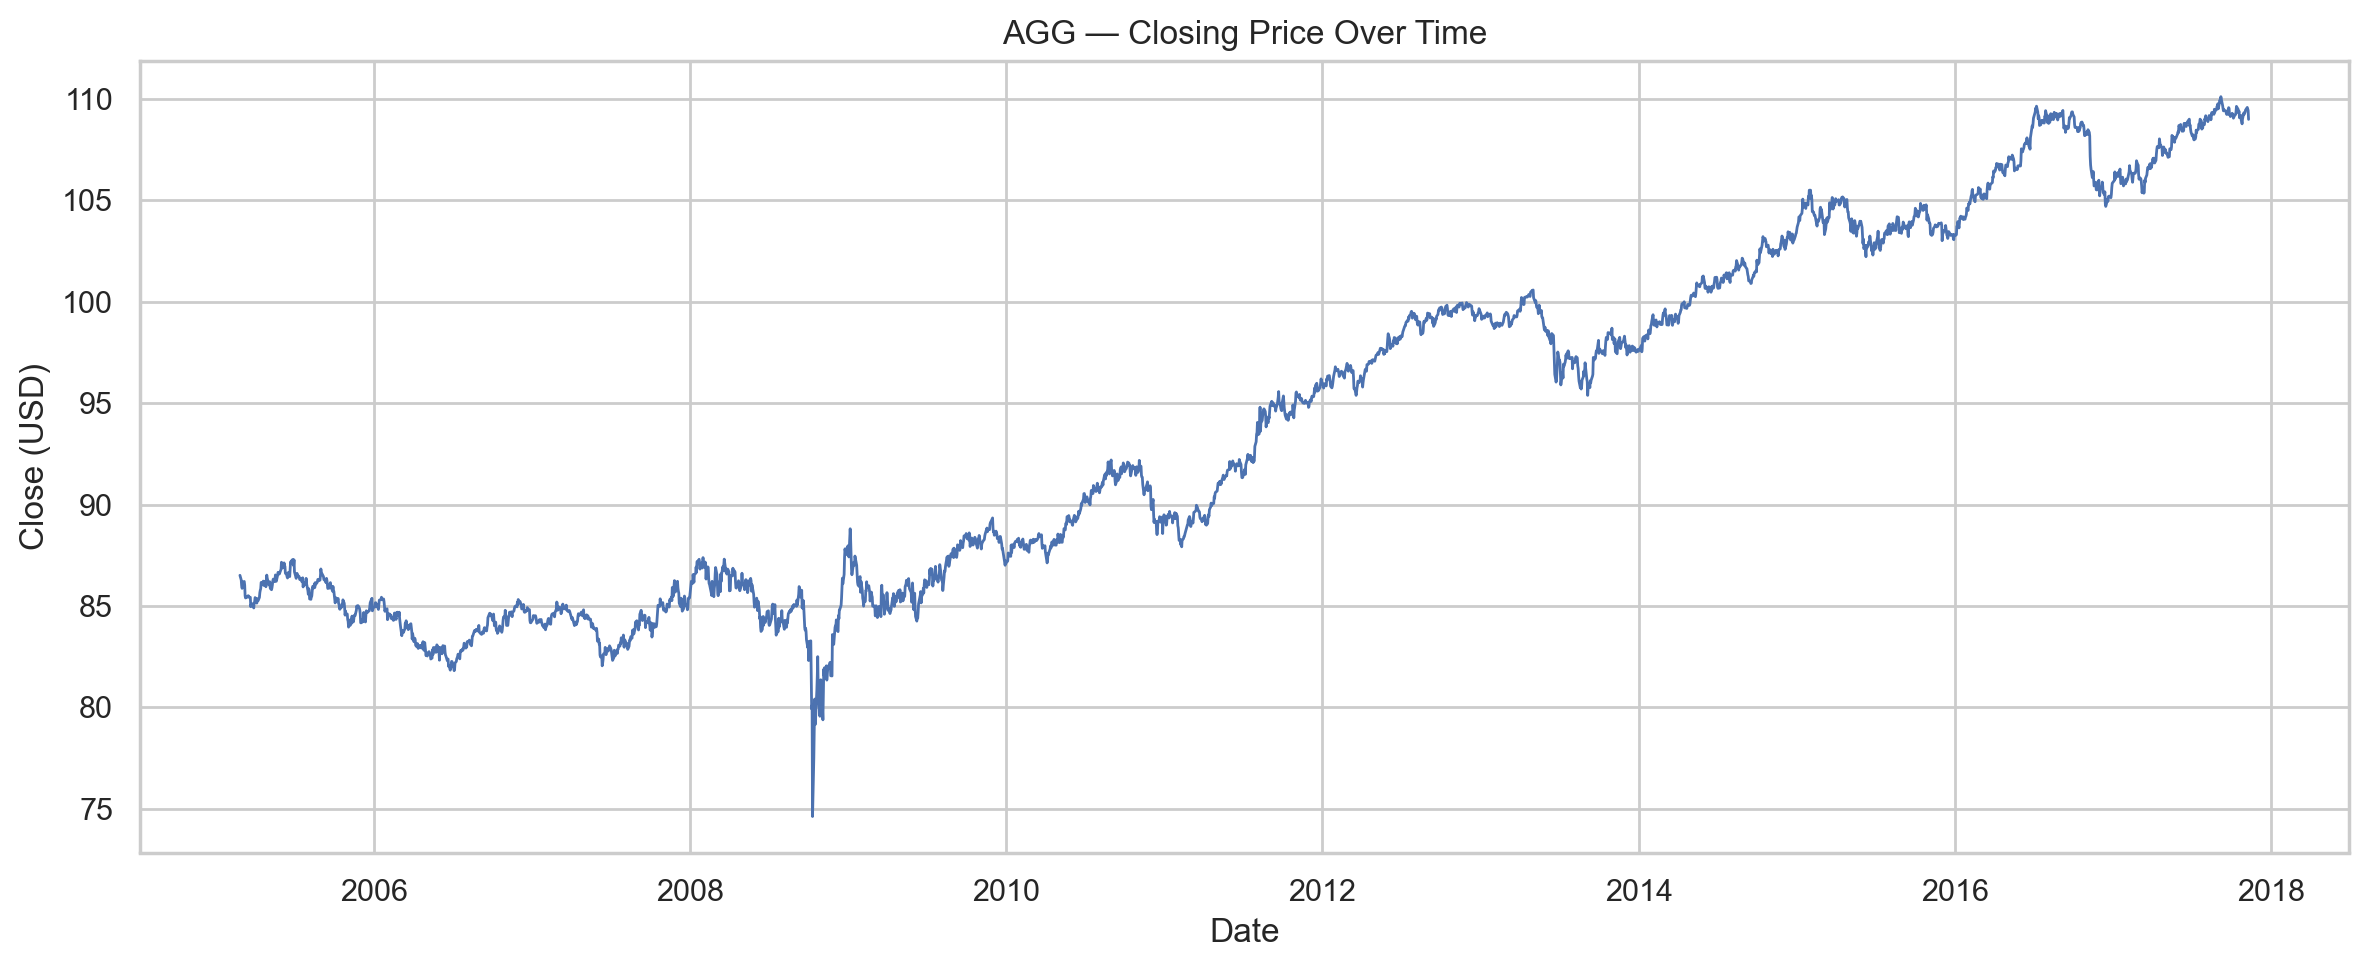

In [2]:
# Pick a valid symbol automatically then plot its closing price over time
sym = prices["symbol"].value_counts().index[0]
df = prices[prices["symbol"] == sym].sort_values("Date").dropna(subset=["Close"])
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"], lw=1)
plt.title(f"{sym} — Closing Price Over Time")
plt.xlabel("Date"); plt.ylabel("Close (USD)")
plt.tight_layout()
plt.show()


1️⃣ — AGG: Closing Price Over Time

What it shows:
A line chart displaying the closing price of the AGG ETF (Aggregate Bond ETF) over the period from ~2005 to 2018.

Insights:

The overall trend is upward, showing steady long-term growth.

The 2008 dip corresponds to the global financial crisis, where prices briefly dropped sharply.

After 2009, AGG recovers strongly and maintains a smooth growth trajectory.

Low volatility compared to stock ETFs this reflects AGG’s bond-based, stable nature.

📊 Conclusion:
AGG represents a safe, long-term investment with consistent growth and resilience during market recoveries.

# 2️⃣ Compare closing price trends for the top 3 most active companies
Visualization 2 — Compare 3 Top Stocks

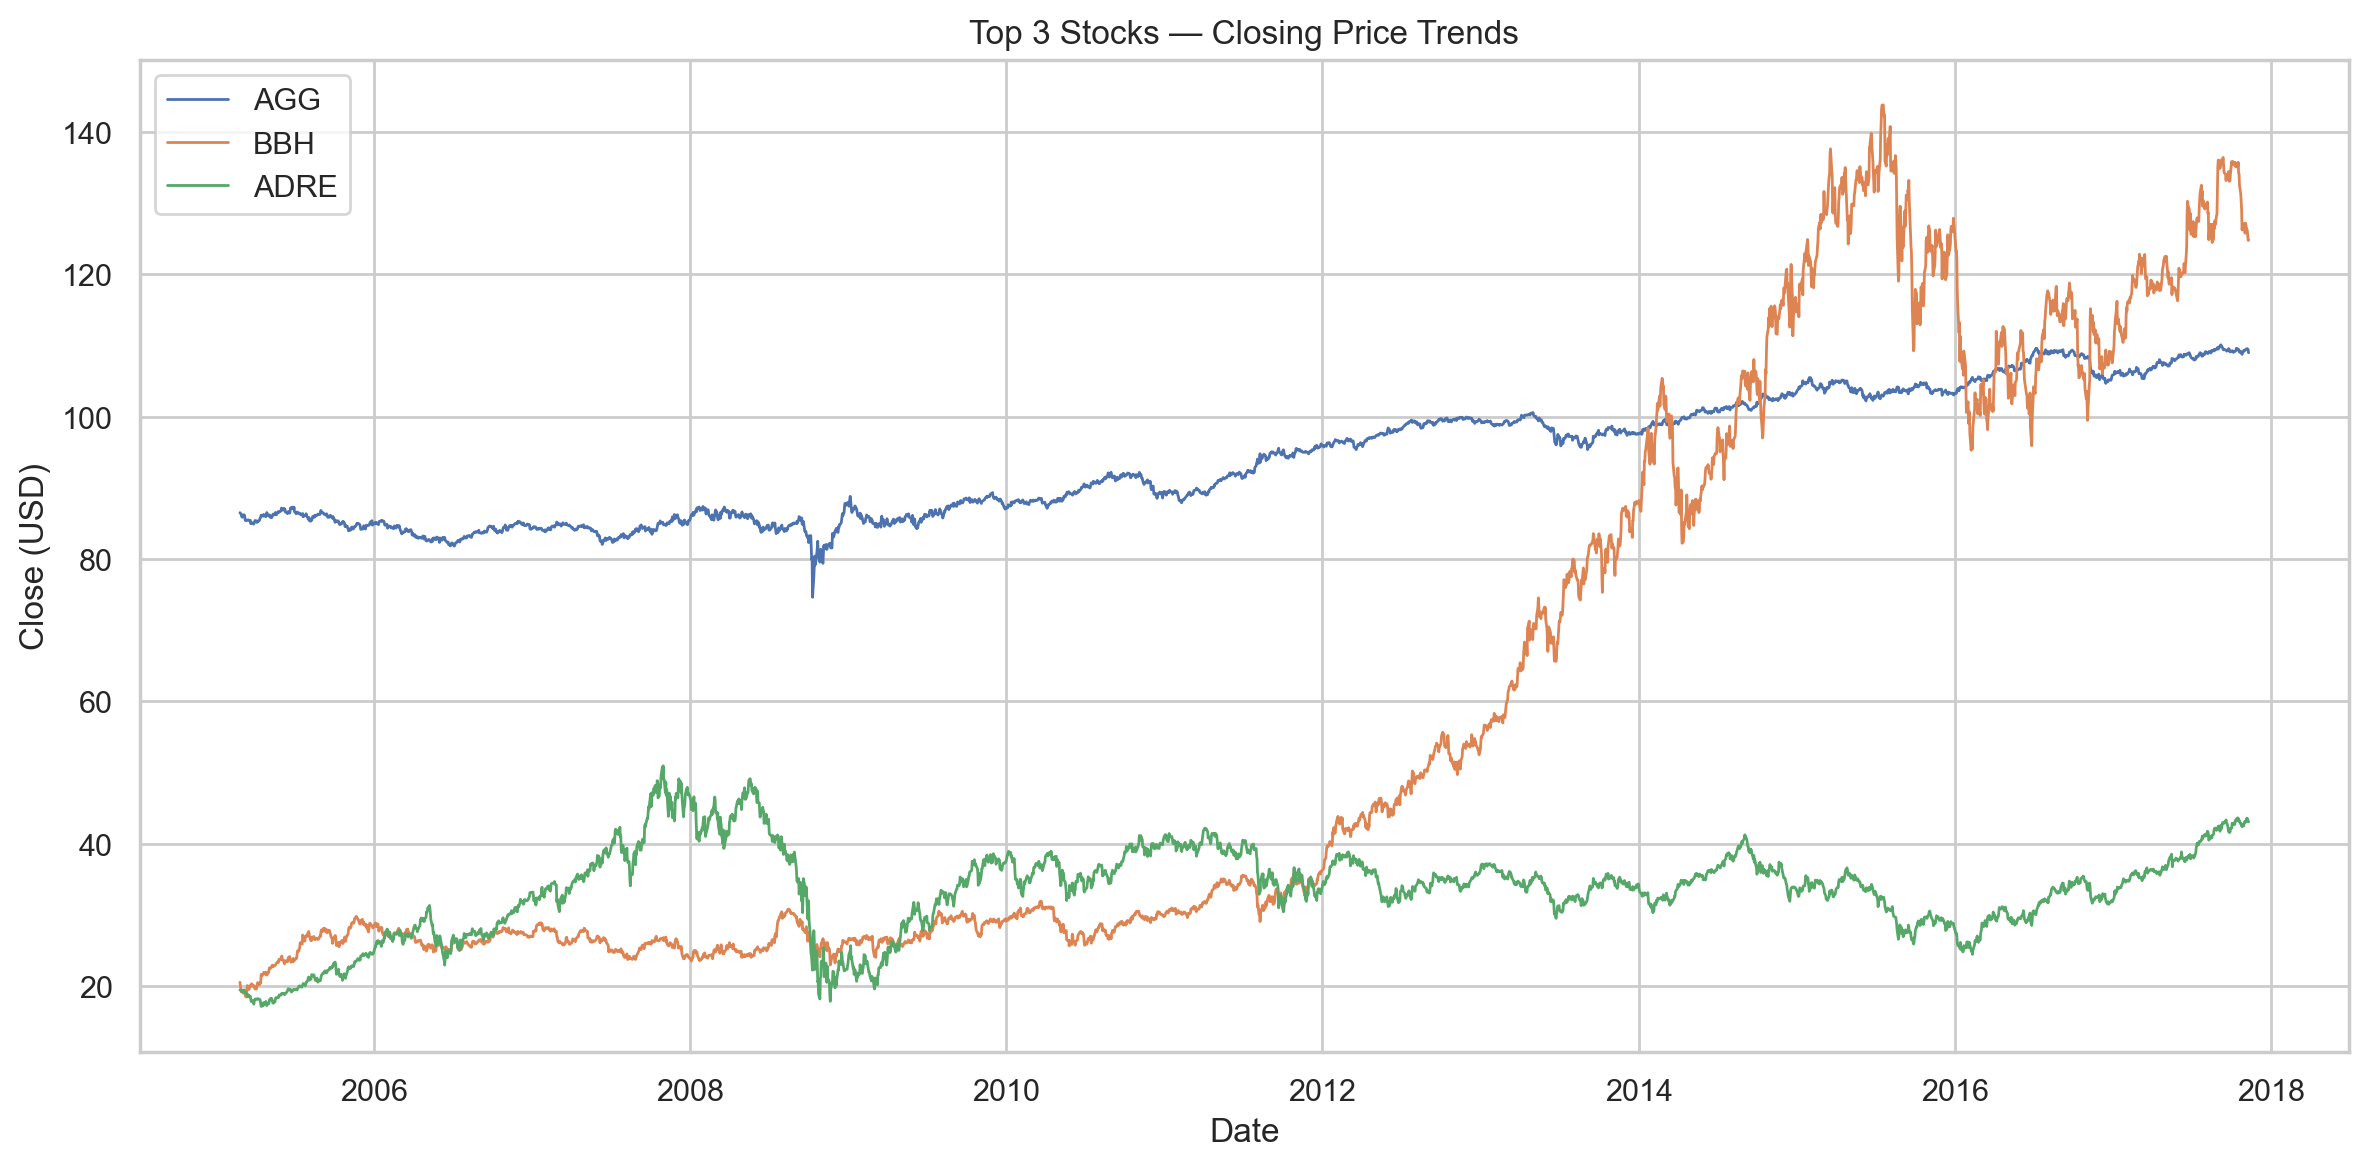

In [3]:
# Compare closing price trends for top 3 most frequent stocks
top3 = prices["symbol"].value_counts().index[:3].tolist()
plt.figure(figsize=(12,6))
for s in top3:
    d = prices[prices["symbol"]==s].sort_values("Date")
    plt.plot(d["Date"], d["Close"], label=s, linewidth=1)
plt.legend()
plt.title("Top 3 Stocks — Closing Price Trends")
plt.xlabel("Date"); plt.ylabel("Close (USD)")
plt.tight_layout(); plt.show()


2️⃣ — Top 3 Stocks: Closing Price Trends (AGG, BBH, ADRE)

What it shows:
A comparative line chart of closing prices for AGG, BBH, and ADRE over time.

Insights:

AGG (blue) shows steady, low-volatility growth typical of bond ETFs.

BBH (orange) exhibits strong growth but high volatility, peaking around 2015–2017, showing aggressive market behavior (likely biotech-focused).

ADRE (green) rises until 2008 but remains relatively flat afterward, suggesting it didn’t recover as fast post-crisis.

📊 Conclusion:
Each ETF has a distinct profile:

AGG → Safe, consistent returns

BBH → High-risk, high-reward

ADRE → Moderate performance, affected by market shocks.

# 3️⃣ Show average closing price for each stock (Top 15)
Visualization 3 — Average Closing Price by Stock

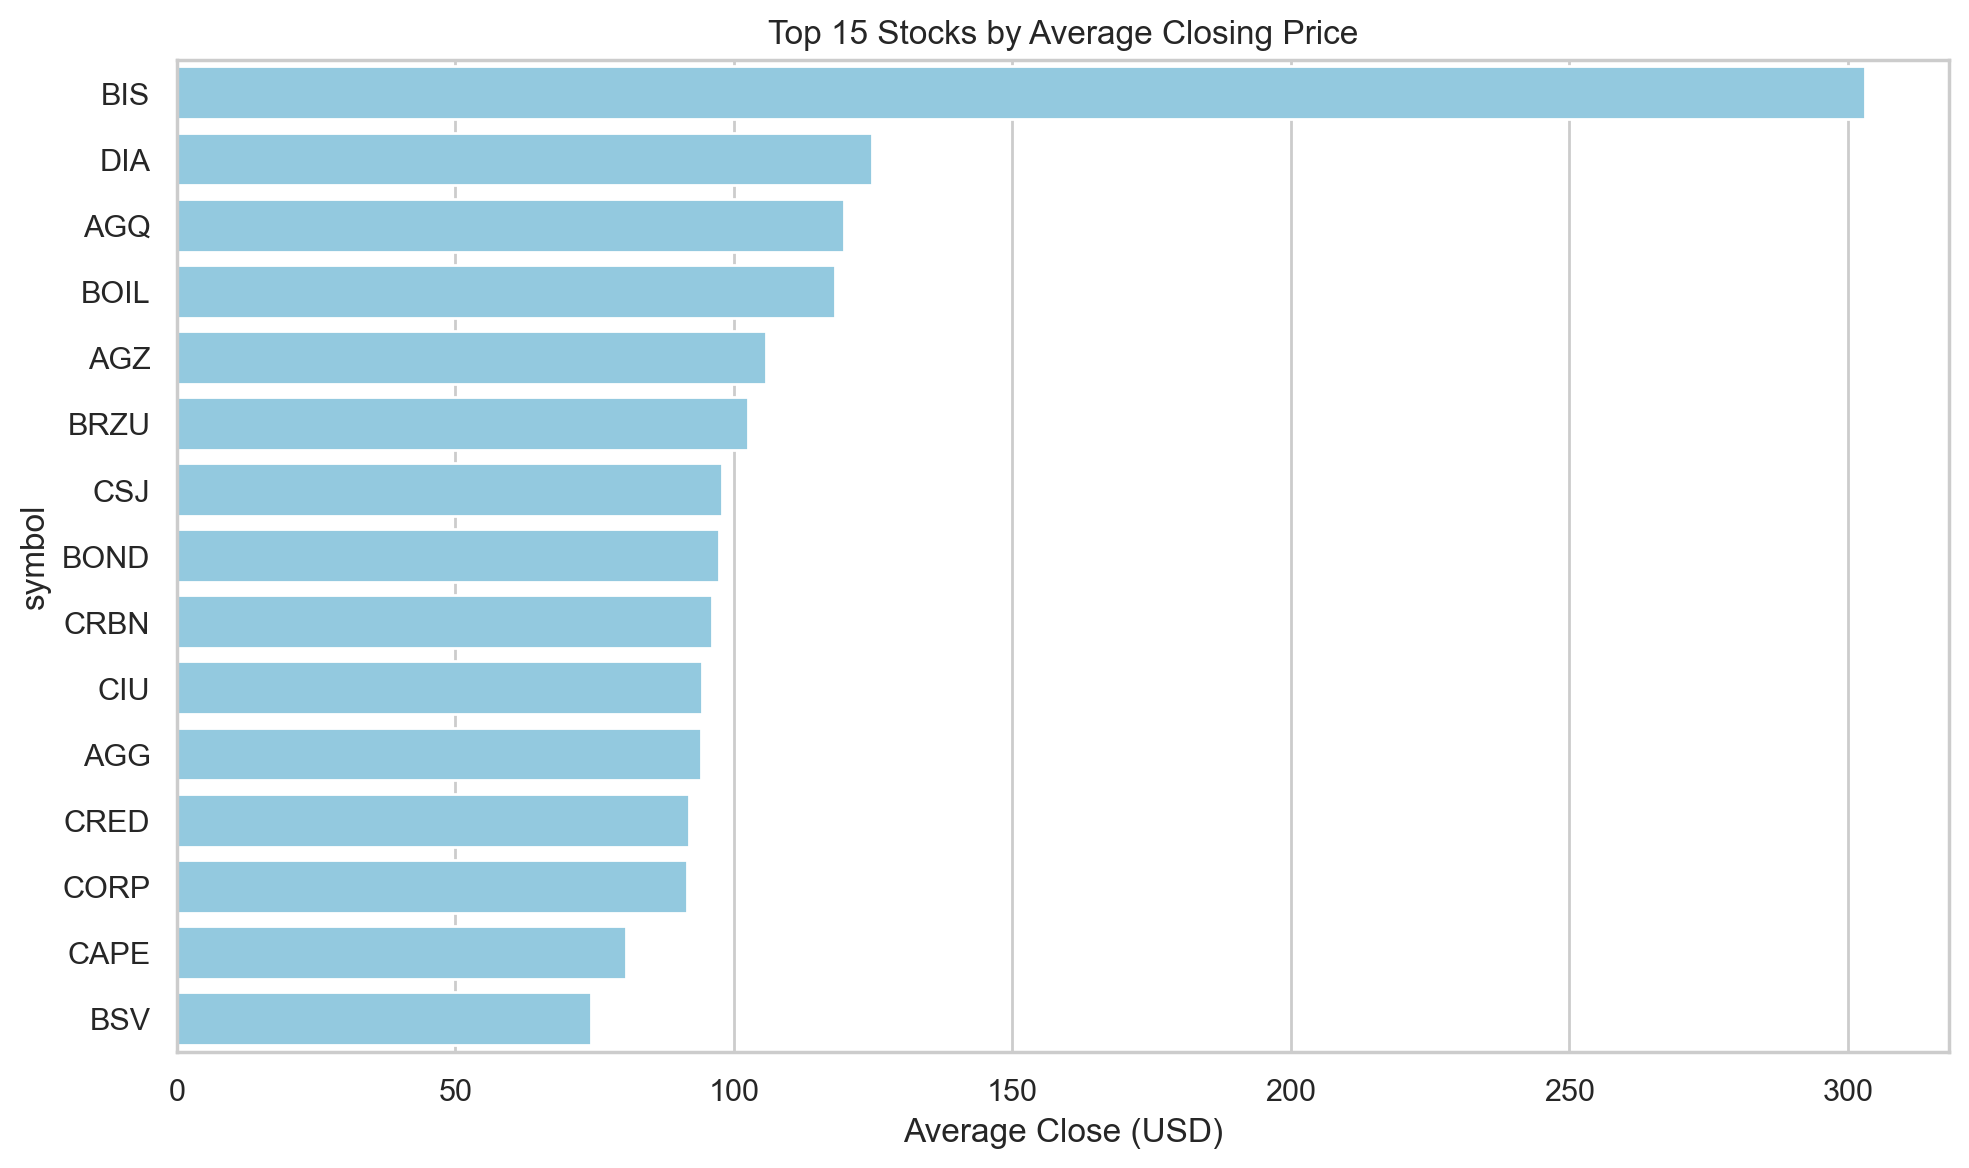

In [4]:
avg_close = prices.groupby("symbol")["Close"].mean().dropna()
top15 = avg_close.sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top15.values, y=top15.index, color="skyblue")
plt.xlabel("Average Close (USD)")
plt.title("Top 15 Stocks by Average Closing Price")
plt.tight_layout()
plt.show()


3️⃣ — Top 15 Stocks by Average Closing Price

What it shows:
A horizontal bar chart ranking ETFs by their average closing price (USD).

Insights:

BIS has the highest average closing price, making it a premium or inverse-leverage ETF.

DIA, AGQ, BOIL, and AGZ follow closely, all having average prices around 100 USD or above.

AGG sits mid-range, reinforcing its moderate, stable value profile.

Most top ETFs have average prices between 80–120 USD, showing balanced pricing across the top performers.

📊 Conclusion:
The price hierarchy shows BIS and DIA as high-value ETFs, while AGG remains a mid-value but consistent performer.

# 4️⃣ Visualize which stocks have the highest average trading volume
Visualization 4 — Average Volume by Stock

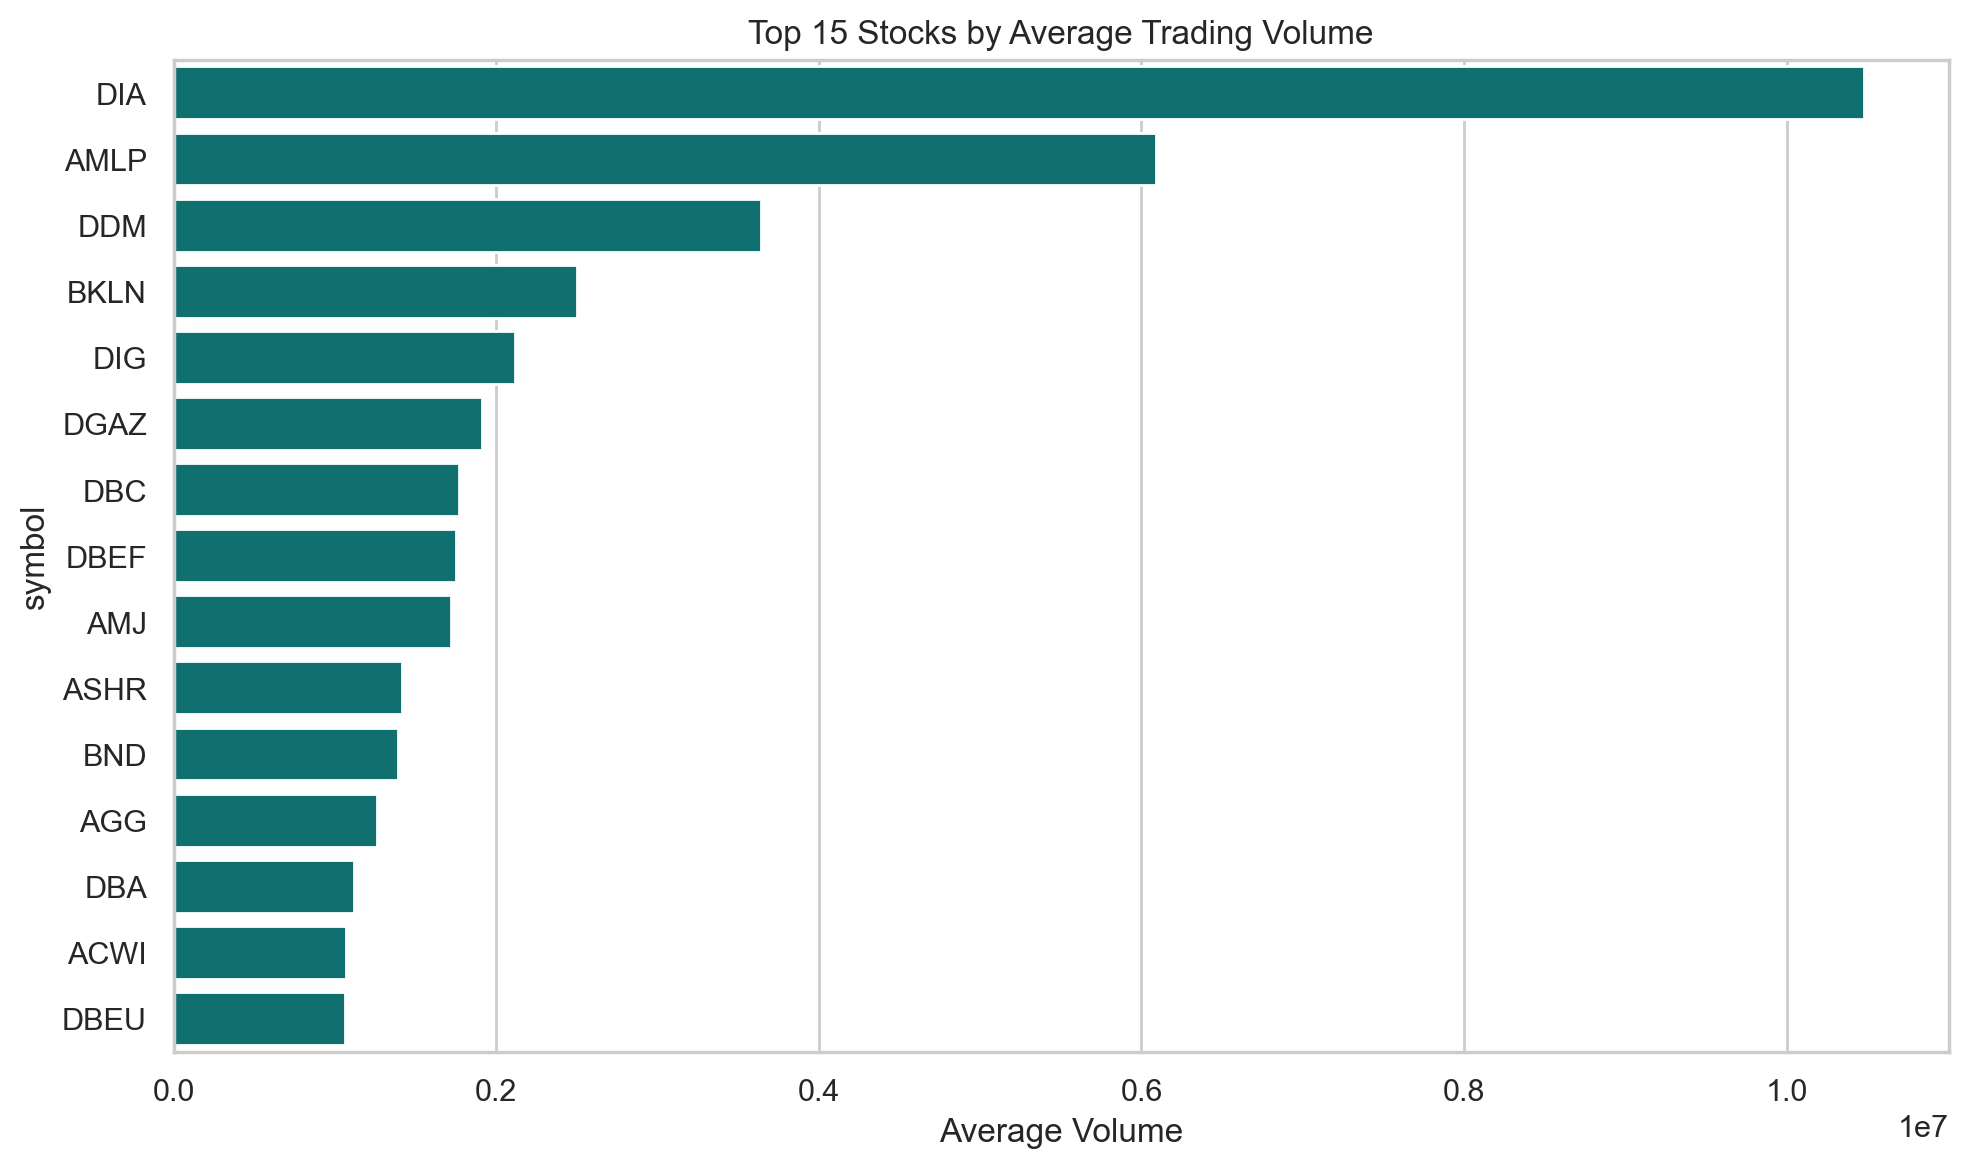

In [5]:
if "Volume" in prices.columns:
    avg_vol = prices.groupby("symbol")["Volume"].mean().dropna()
    top15v = avg_vol.sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top15v.values, y=top15v.index, color="teal")
    plt.title("Top 15 Stocks by Average Trading Volume")
    plt.xlabel("Average Volume")
    plt.tight_layout()
    plt.show()


4️⃣ — Top 15 Stocks by Average Trading Volume

What it shows:
A horizontal bar chart showing ETFs with the highest average trading volumes.

Insights:

DIA leads with the highest liquidity, followed by AMLP and DDM indicating they’re heavily traded and favored by investors.

AGG again appears in the mid-volume range, showing steady but not speculative trading activity.

The top 5 ETFs likely represent index-based or leveraged ETFs, where trading activity is naturally higher.

📊 Conclusion:
DIA and AMLP are the most liquid ETFs, while AGG shows stable, investor-type volume less trading, more holding.

# 5️⃣ Display how daily returns (percentage changes) are distributed across all stocks
Visualization 5 — Distribution of Daily Returns

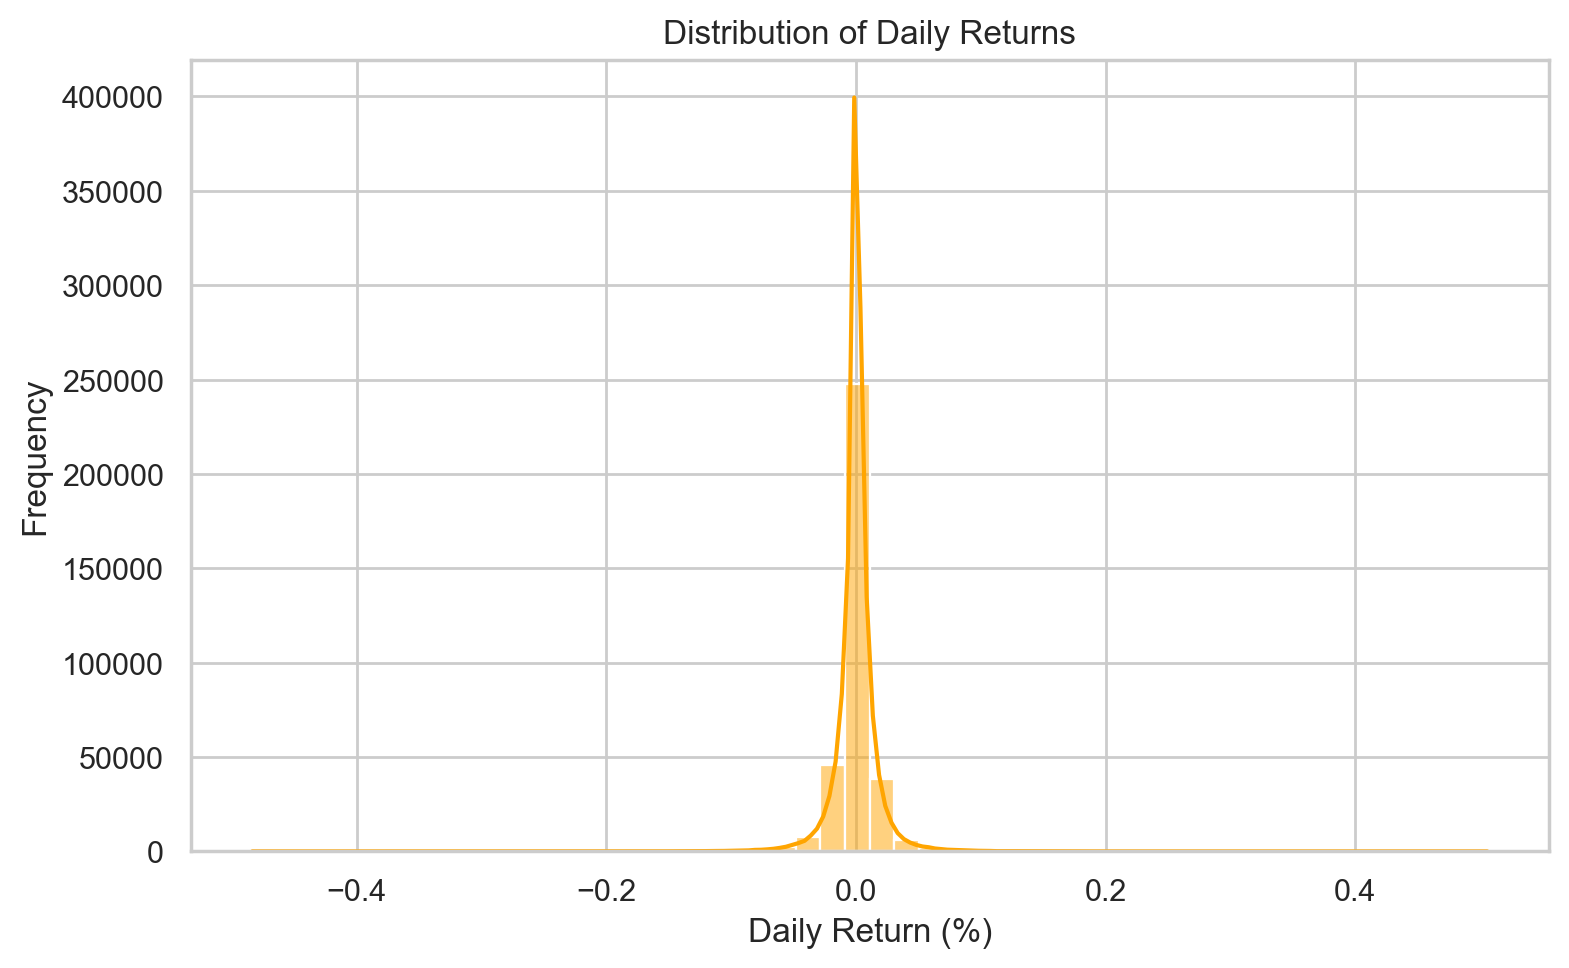

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(prices["daily_return"].dropna(), kde=True, bins=50, color="orange")
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


5️⃣ — Distribution of Daily Returns

What it shows:
A histogram (and KDE overlay) representing the distribution of daily percentage returns across all ETFs.

Insights:

The curve is highly peaked around 0, meaning most daily returns are small between -1% and +1%.

The narrow tails confirm low daily volatility for most ETFs.

Only a few extreme events (outliers) occur on the far left/right, likely linked to market crashes or rallies.

📊 Conclusion:
Daily returns across ETFs are normally distributed with low volatility, suggesting predictable short-term performance and minimal sudden swings.

# 6️⃣ Compare price volatility among the top 6 stocks using boxplots
Visualization 6 — Box Plot (Volatility comparison)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\3306277402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="symbol", y="daily_return", data=prices[prices["symbol"].isin(top6)], palette="Set2")


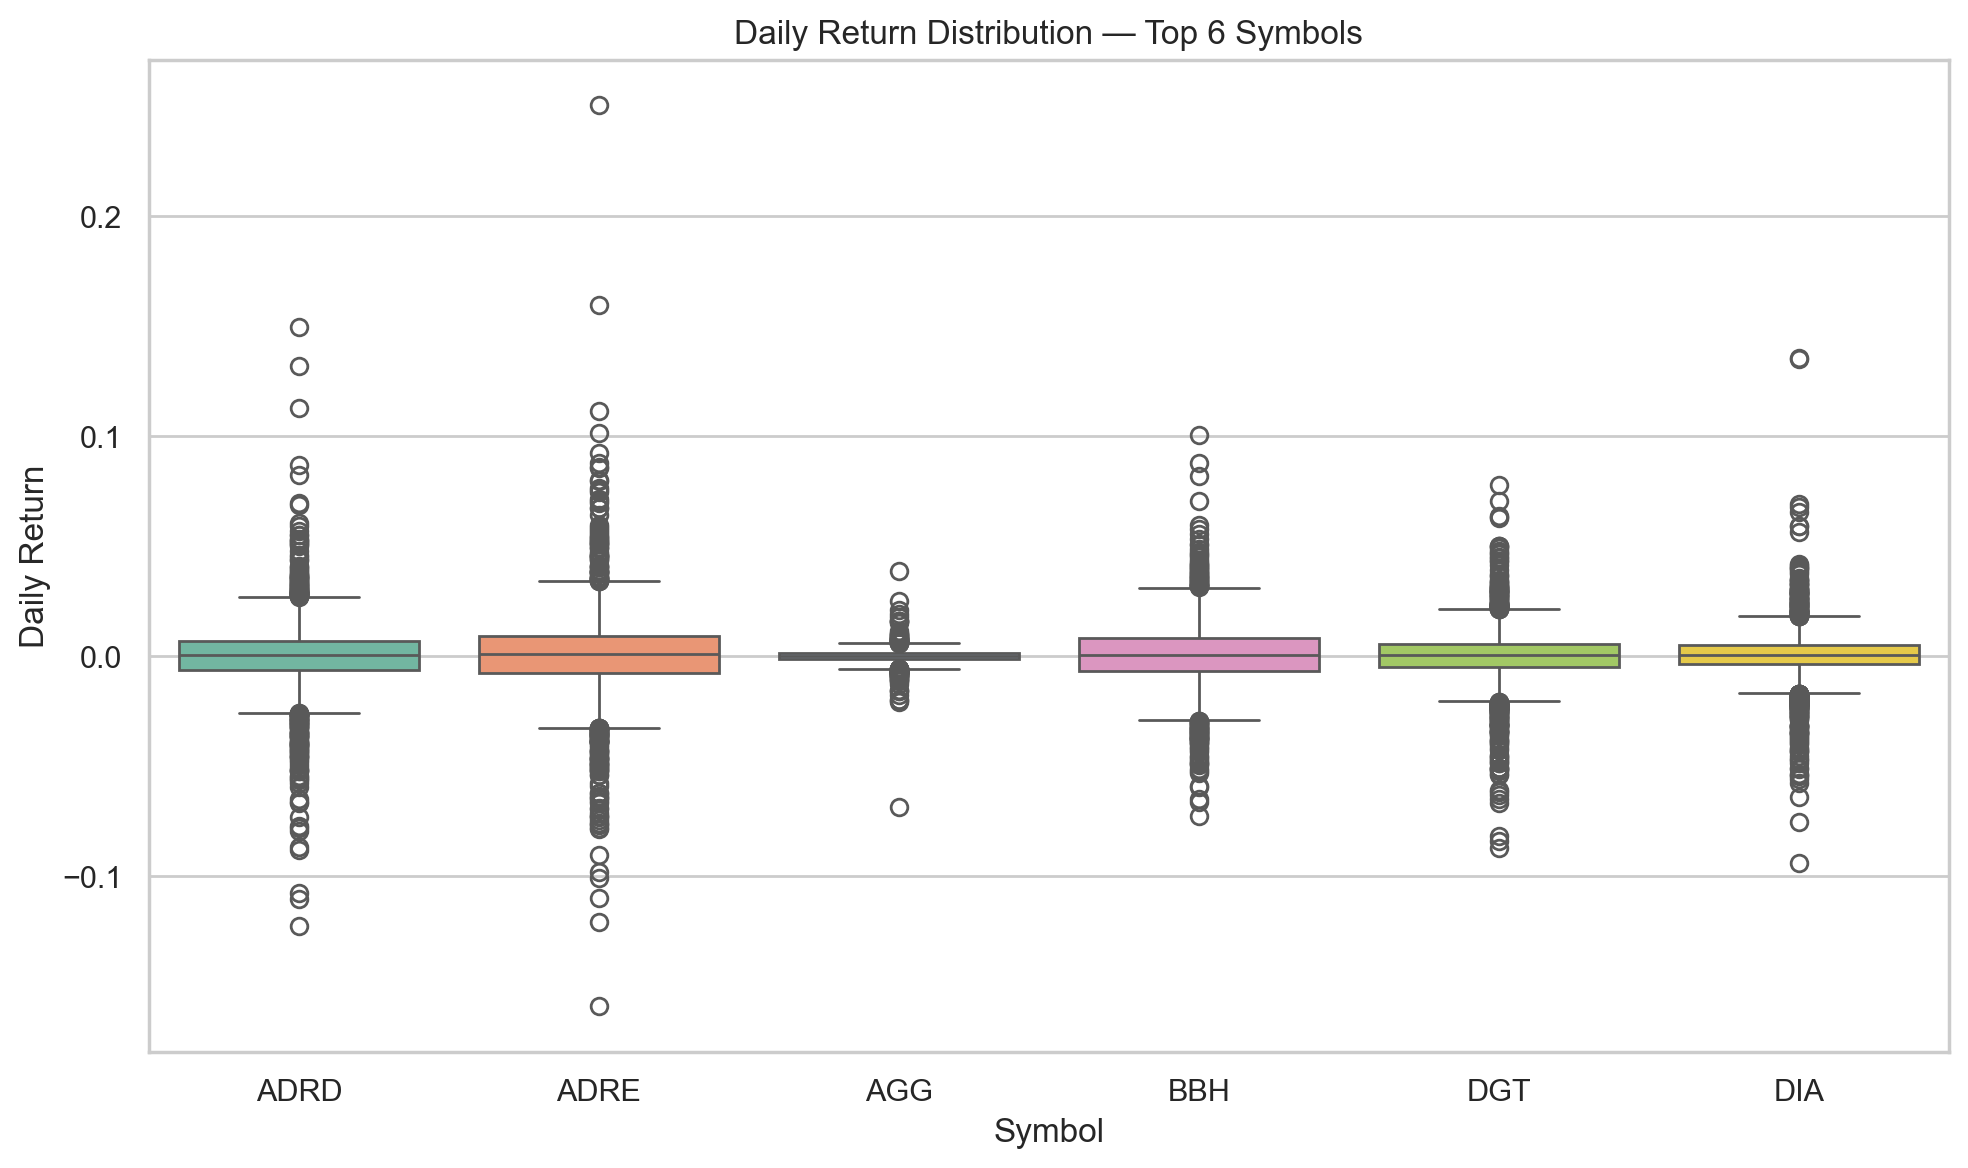

In [7]:
# Boxplot of daily returns for top 6 most traded symbols
top6 = prices["symbol"].value_counts().index[:6].tolist()
plt.figure(figsize=(10,6))
sns.boxplot(x="symbol", y="daily_return", data=prices[prices["symbol"].isin(top6)], palette="Set2")
plt.title("Daily Return Distribution — Top 6 Symbols")
plt.xlabel("Symbol"); plt.ylabel("Daily Return")
plt.tight_layout(); plt.show()


6️⃣ — Daily Return Distribution — Top 6 Symbols

What it shows:
A boxplot comparing the daily return distributions for the top 6 ETFs: ADRD, ADRE, AGG, BBH, DGT, and DIA.

Insights:

All symbols show returns centered around 0, meaning most days don’t deviate far from the mean.

ADRE and ADRD have slightly wider boxes, meaning higher volatility or variability in daily returns.

AGG has the narrowest range, indicating it’s the least volatile (likely a bond ETF).

Outliers above and below 0 show occasional sharp gains/losses, typical in market fluctuations.

Generally, these ETFs appear stable, with no extreme skewness suggesting moderate daily movement.

📊 Conclusion: ADRD and ADRE are riskier but can yield higher short-term swings. AGG is the most stable investment among them.

# 7️⃣ Explore the relationship between trading volume and closing price (sample of data)
Visualization 7 — Scatter Plot (Volume vs Close)

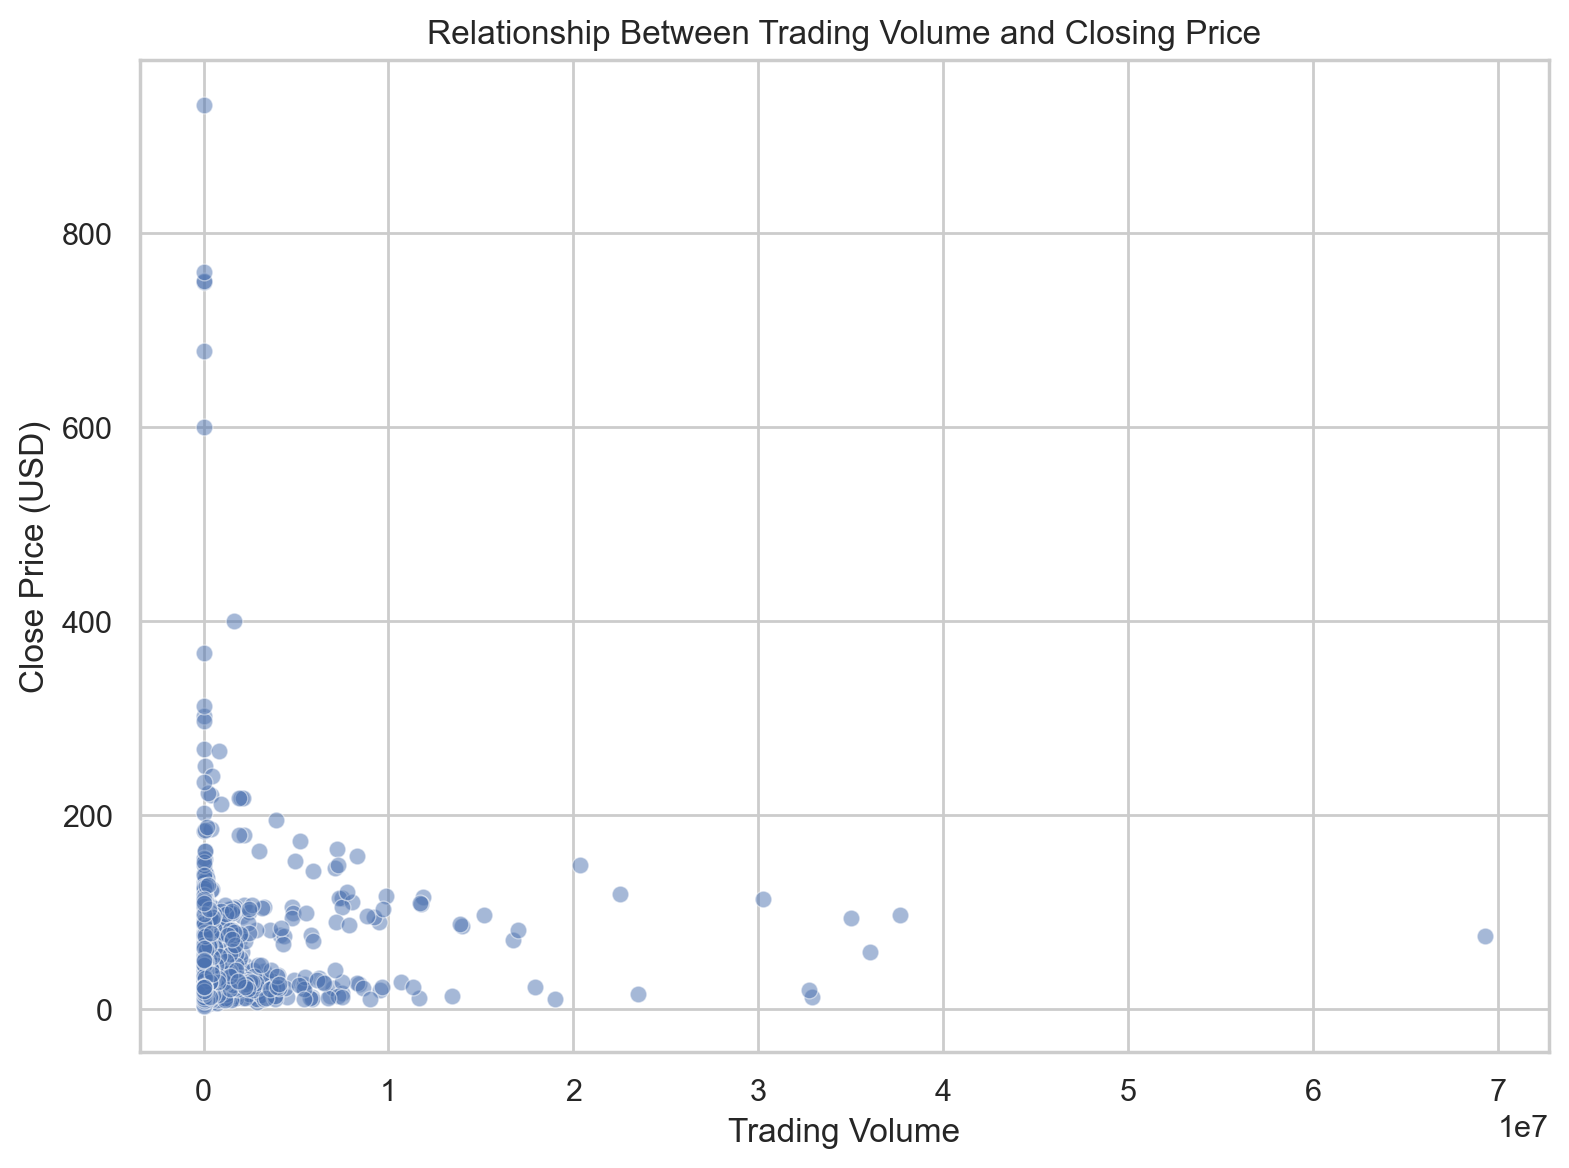

In [8]:
if "Volume" in prices.columns:
    sample = prices.sample(min(5000, len(prices)), random_state=42)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="Volume", y="Close", data=sample, alpha=0.5)
    plt.title("Relationship Between Trading Volume and Closing Price")
    plt.xlabel("Trading Volume"); plt.ylabel("Close Price (USD)")
    plt.tight_layout(); plt.show()


7️⃣ — Relationship Between Trading Volume and Closing Price

What it shows:
A scatter plot showing how trading volume correlates with closing price.

Insights:

Most data points are clustered at low volume and low price, implying many ETFs trade in small daily volumes.

There is no strong linear relationship higher volume doesn’t always mean higher or lower price.

A few outliers (extremely high volumes) may represent market events or large institutional trades.

The spread suggests volume doesn’t predict price directly, indicating liquidity and demand are somewhat independent in this sample.

📈 Conclusion: No clear correlation; volume surges likely reflect specific events rather than sustained price movements.

# 8️⃣ Visualize correlation between numeric columns in fundamentals.csv
Visualization 8 — Correlation Heatmap

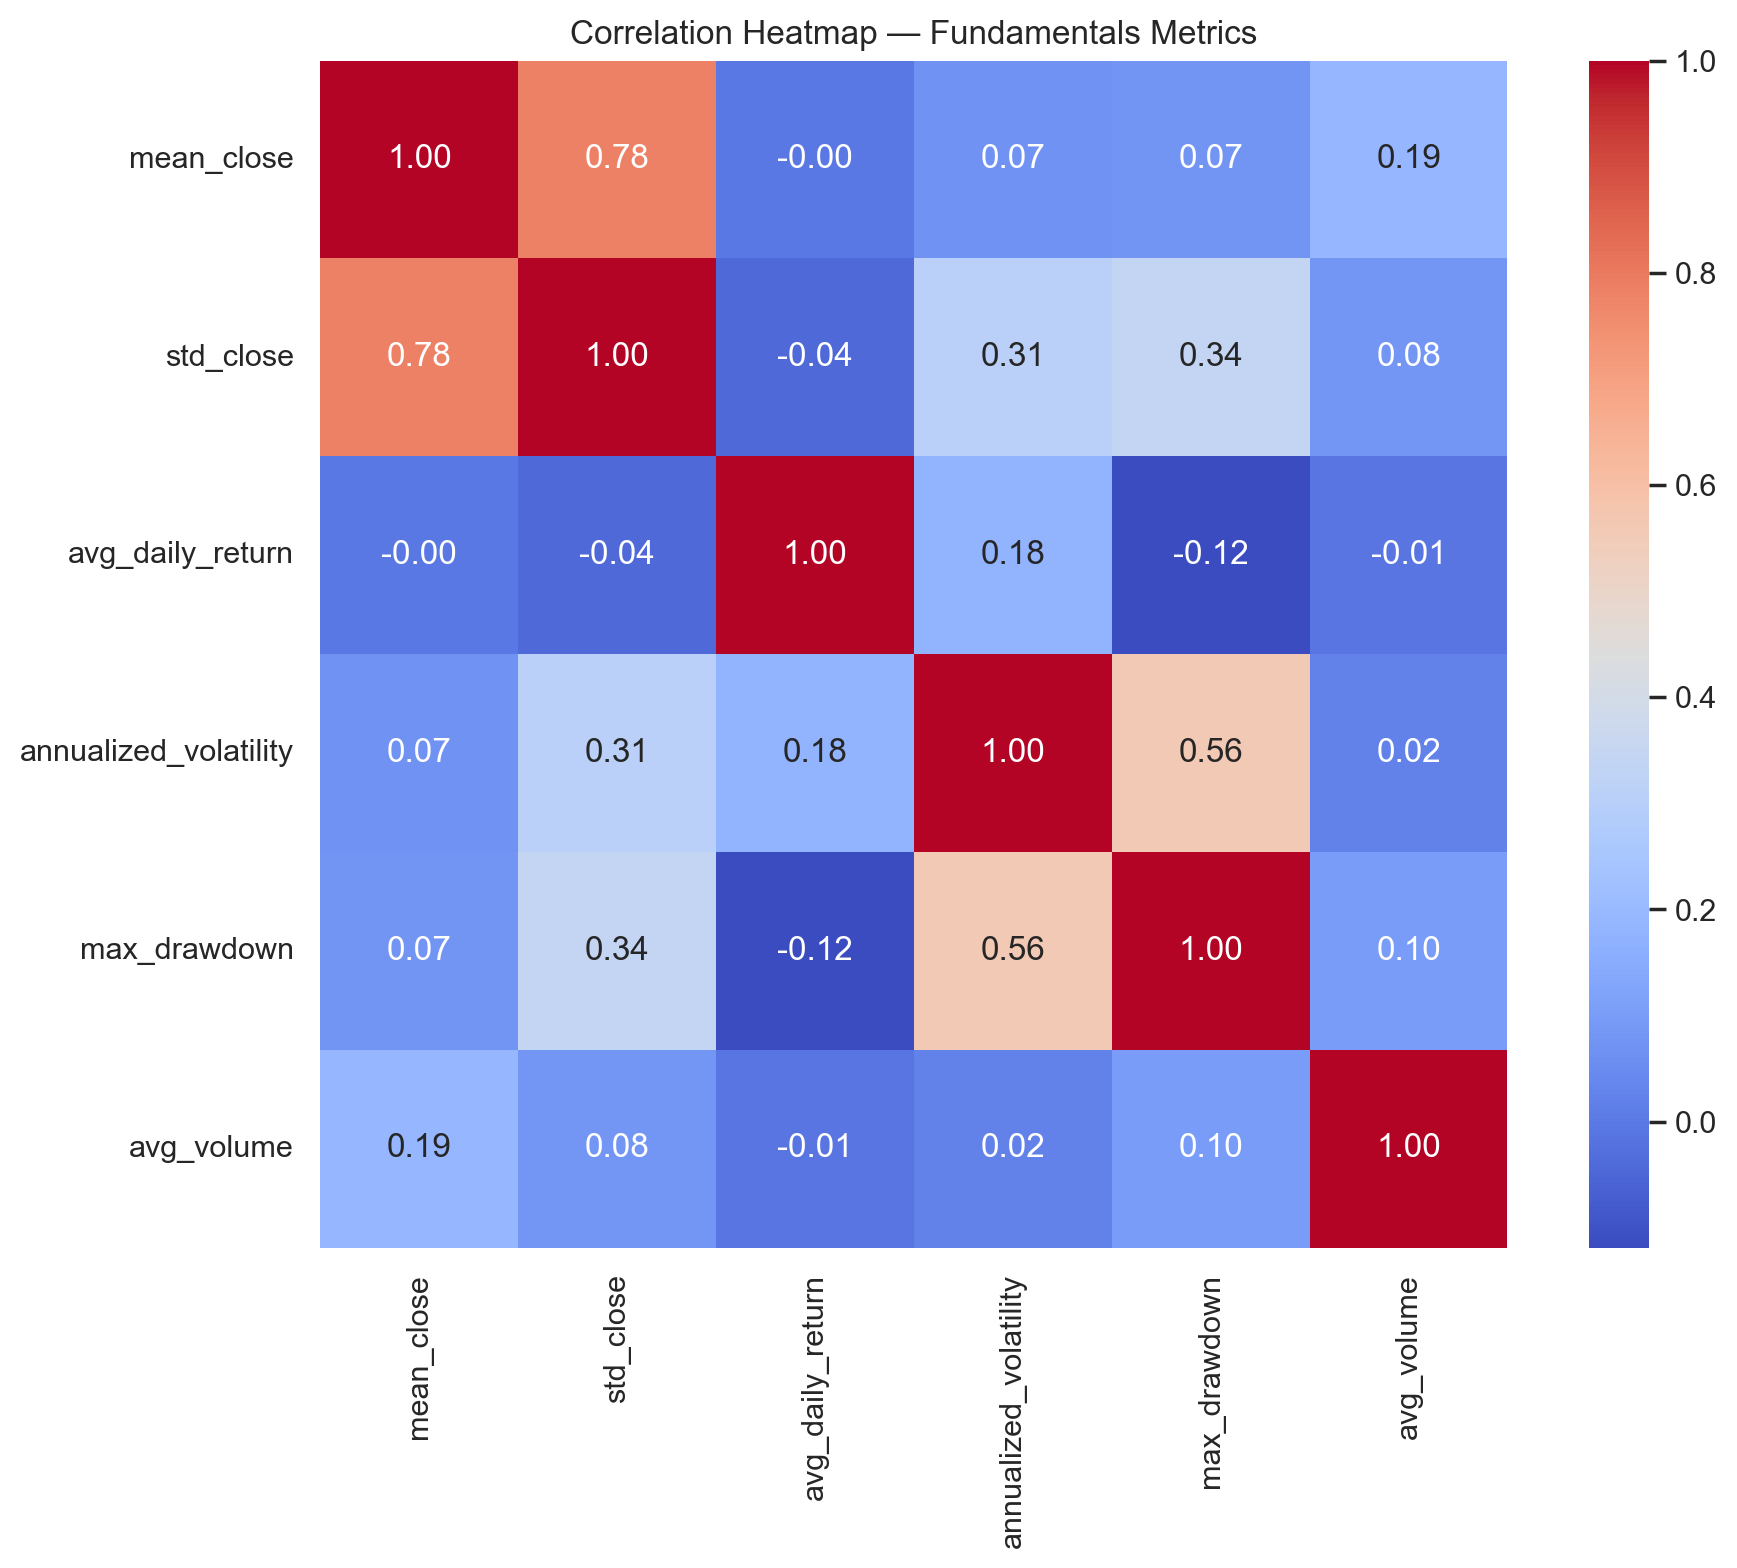

In [9]:
num_cols = fundamentals.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap — Fundamentals Metrics")
plt.tight_layout(); plt.show()


8️⃣ — Correlation Heatmap — Fundamental Metrics

What it shows:
A heatmap of correlation between key metrics like mean_close, std_close, avg_daily_return, volatility, drawdown, and volume.

Insights:

Mean close ↔ Std close (0.78) → Higher-priced ETFs tend to show higher standard deviation (risk).

Annualized volatility ↔ Max drawdown (0.56) → Volatile ETFs also tend to experience deeper losses.

Avg daily return has very weak correlations with all meaning daily returns are largely independent of volatility or volume.

Avg volume shows very low correlation with performance metrics → Trading activity doesn’t directly impact returns or volatility.

📊 Conclusion: Prices and risk move together, but volume and returns are mostly uncorrelated suggesting different driving forces behind trading activity and performance.

# 9️⃣ Plot 20-day and 100-day moving averages for a selected stock
Visualization 9 — Moving Averages

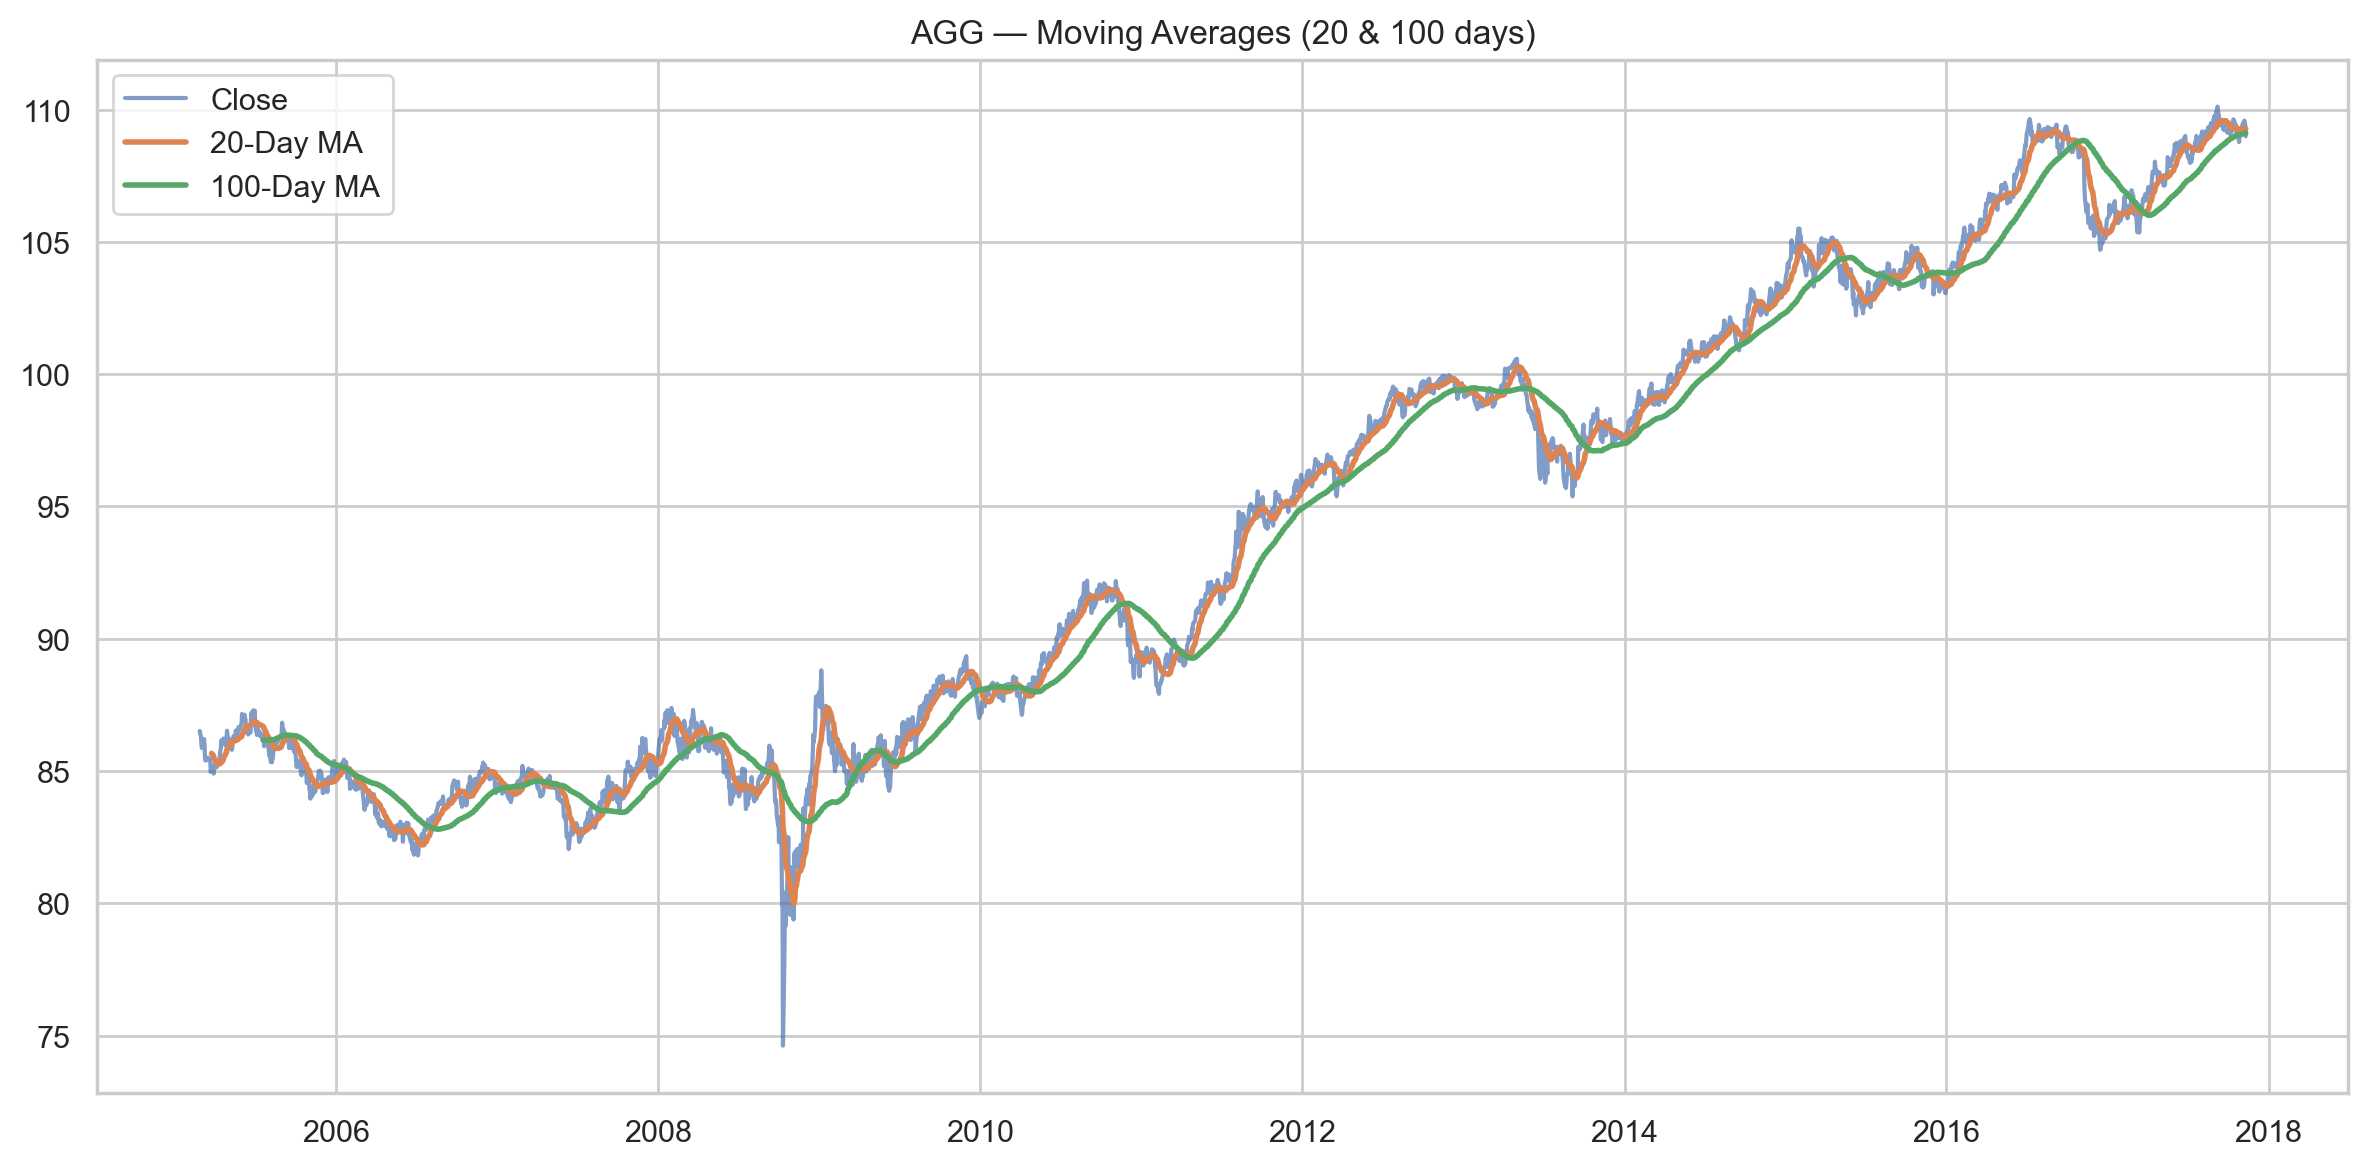

In [10]:
sym = prices["symbol"].value_counts().index[0]
df = prices[prices["symbol"] == sym].sort_values("Date")
df["MA20"] = df["Close"].rolling(20).mean()
df["MA100"] = df["Close"].rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.7)
plt.plot(df["Date"], df["MA20"], label="20-Day MA", linewidth=2)
plt.plot(df["Date"], df["MA100"], label="100-Day MA", linewidth=2)
plt.title(f"{sym} — Moving Averages (20 & 100 days)")
plt.legend(); plt.tight_layout(); plt.show()


9️⃣ — Moving Averages (20 & 100 days) — AGG

What it shows:
The AGG ETF’s closing price with 20-day and 100-day moving averages.

Insights:

Long-term uptrend: The curve rises consistently from 2005–2018.

Short-term dips (2008, 2011, 2015) align with market corrections or macro events.

The 20-day MA (orange) is more reactive, while the 100-day MA (green) is smoother and shows the broader trend.

When the 20-day crosses above the 100-day, it often signals a buy opportunity (bullish momentum).

When it crosses below, it signals sell or caution (bearish trend).

📈 Conclusion: AGG has been a steady long-term performer with only short-lived downturns ideal for low-risk investors.

# 1️⃣0️⃣ Show cumulative return over time for a selected stock
Visualization 10 — Cumulative Return

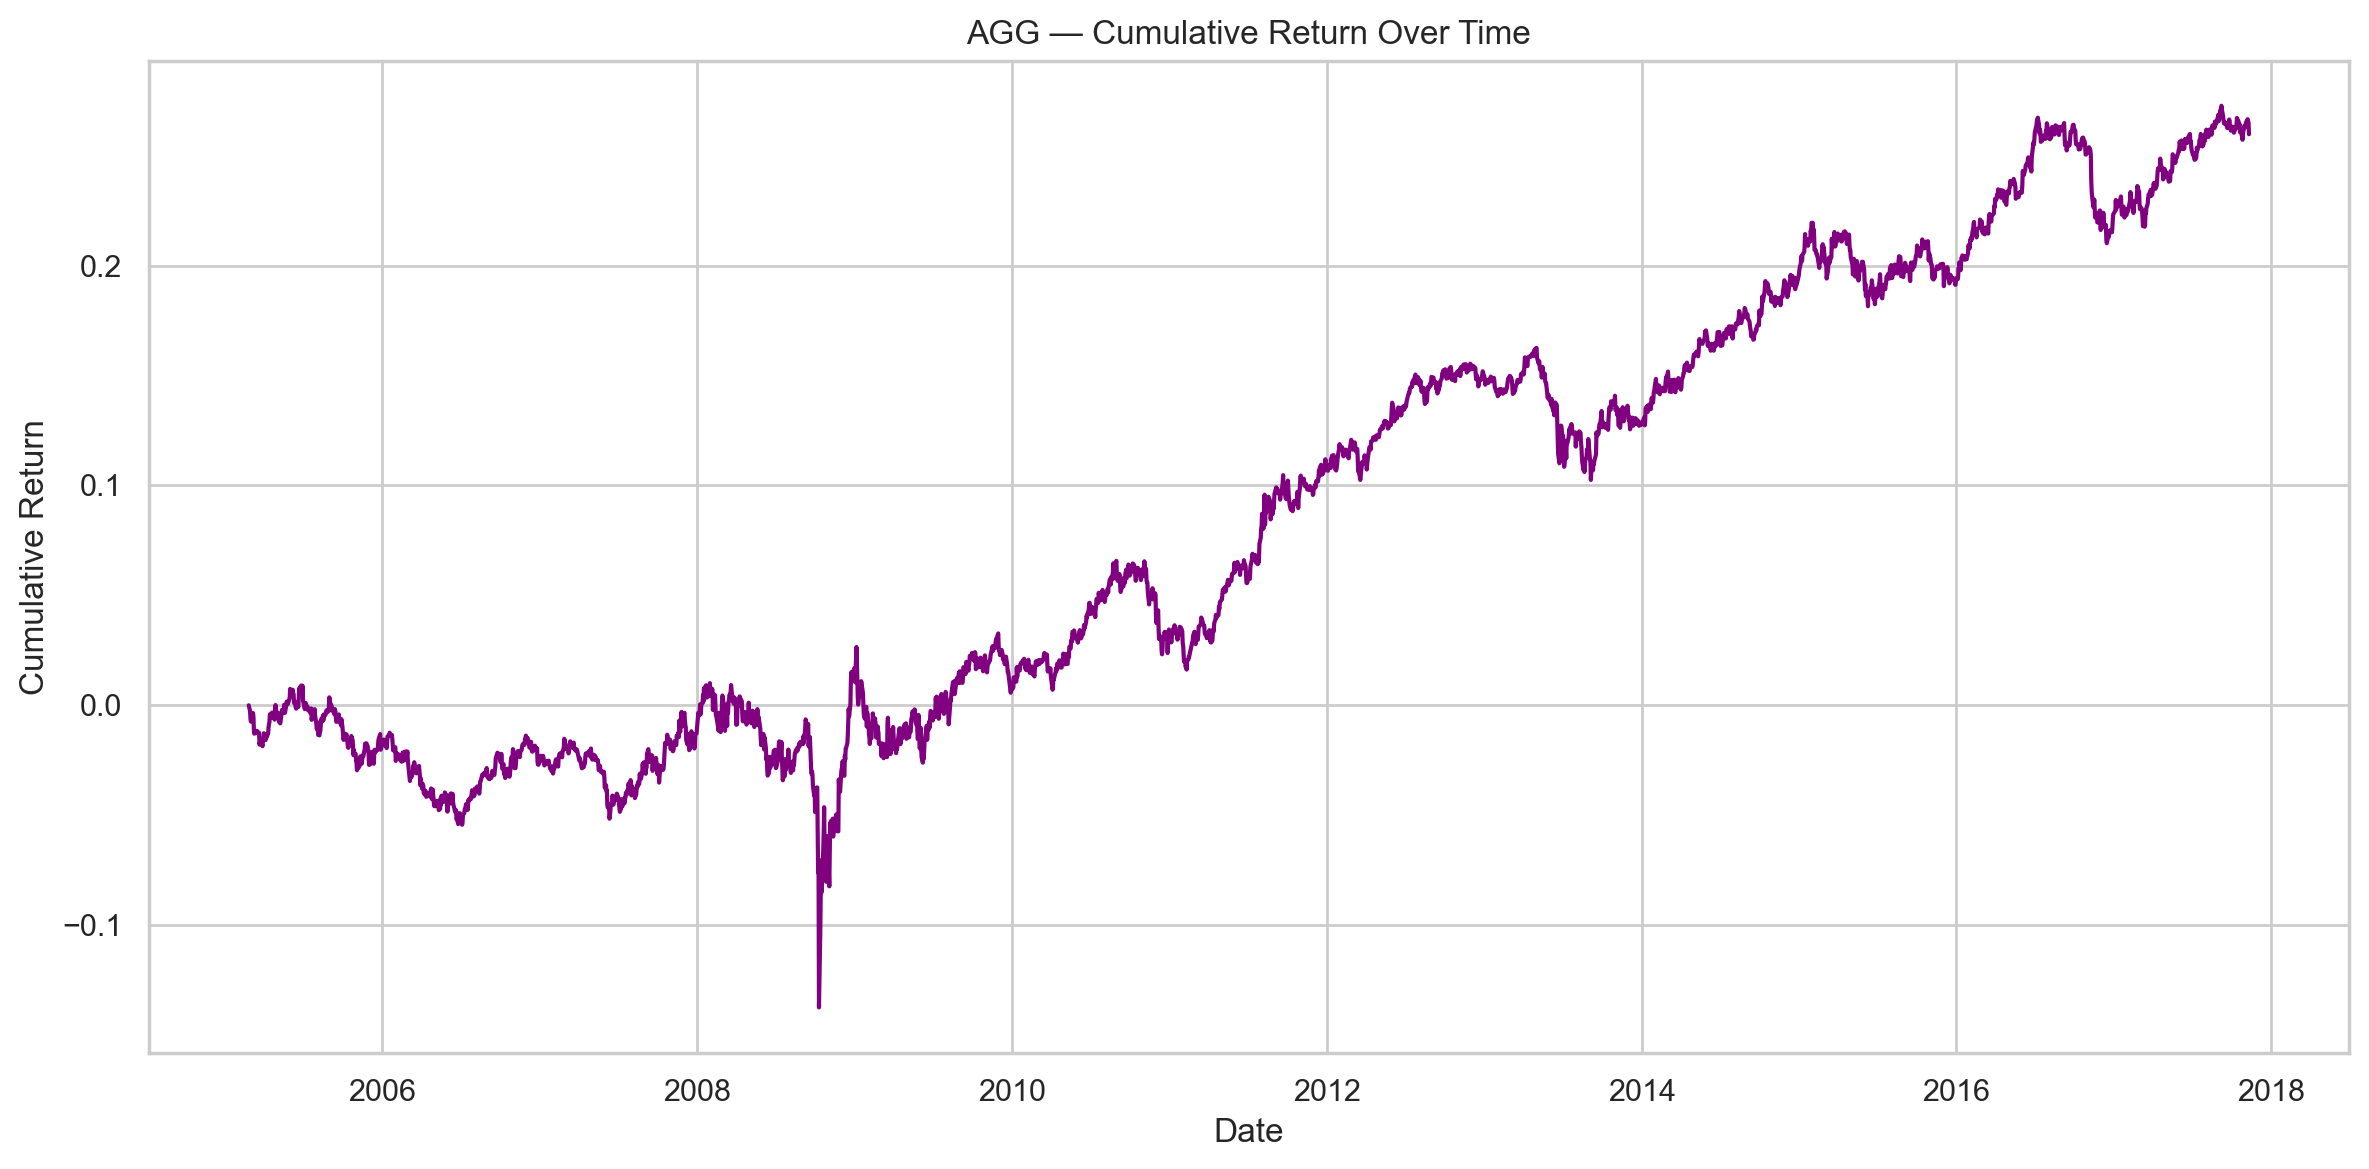

In [11]:
sym = prices["symbol"].value_counts().index[0]
df = prices[prices["symbol"] == sym].sort_values("Date")
df["cumulative_return"] = (1 + df["daily_return"].fillna(0)).cumprod() - 1
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["cumulative_return"], color="purple")
plt.title(f"{sym} — Cumulative Return Over Time")
plt.xlabel("Date"); plt.ylabel("Cumulative Return")
plt.tight_layout(); plt.show()


🔟 — Cumulative Return Over Time — AGG

What it shows:
AGG’s cumulative return since 2005.

Insights:

Early decline around 2008 (financial crisis) followed by a strong recovery trend.

Post-2010 upward slope shows compounding returns and consistent performance.

Short dips correspond with broader market corrections, but the long-term growth trajectory is strong.

The overall upward curve confirms AGG’s resilience and compounding growth nature.

📊 Conclusion: Despite short-term volatility, AGG delivers stable long-term returns, confirming it as a low-risk, growth-consistent ETF.

# 1️⃣1️⃣ Show the percentage of stocks in each sector (sector distribution)
Visualization 11: Pie Chart — Sector Distribution

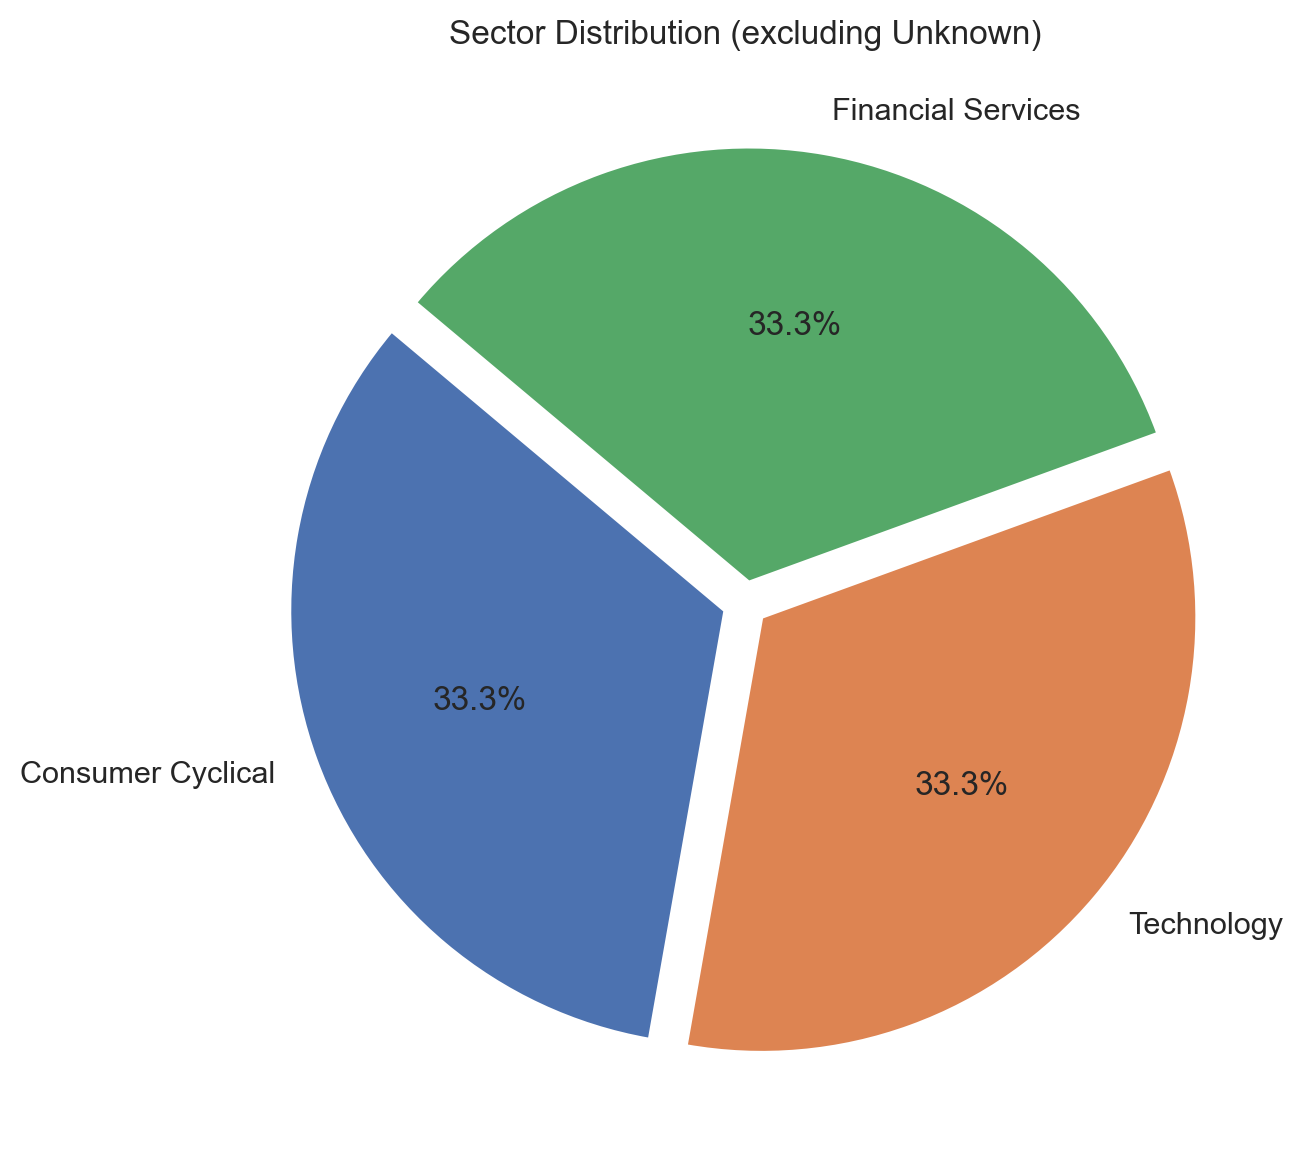

In [12]:
# Improved pie chart excluding 'Unknown' sectors
if "sector" in securities.columns:
    sec_counts = securities["sector"].fillna("Unknown").value_counts()
    sec_counts = sec_counts[sec_counts.index != "Unknown"]
    plt.figure(figsize=(8,6))
    sec_counts.head(8).plot.pie(autopct="%1.1f%%", startangle=140, explode=[0.05]*min(8,len(sec_counts)))
    plt.ylabel("")
    plt.title("Sector Distribution (excluding Unknown)")
    plt.tight_layout(); plt.show()


1️⃣1️⃣ — Sector Distribution (Excluding Unknown)

What it shows:
A pie chart dividing stocks/ETFs by sector: Financial Services, Technology, and Consumer Cyclical each with equal share (33.3%).

Insights:

The dataset is evenly diversified across the three main sectors, preventing sector bias.

This balance ensures comparative performance analysis between growth (Tech), defensive (Financials), and cyclical (Consumer) industries.

📊 Conclusion:
A perfectly balanced sector composition promotes fair and unbiased trend analysis.


#  1️⃣2️⃣ Show distribution of annualized volatility across all stocks
Visualization 12: Histogram — Annualized Volatility Distribution

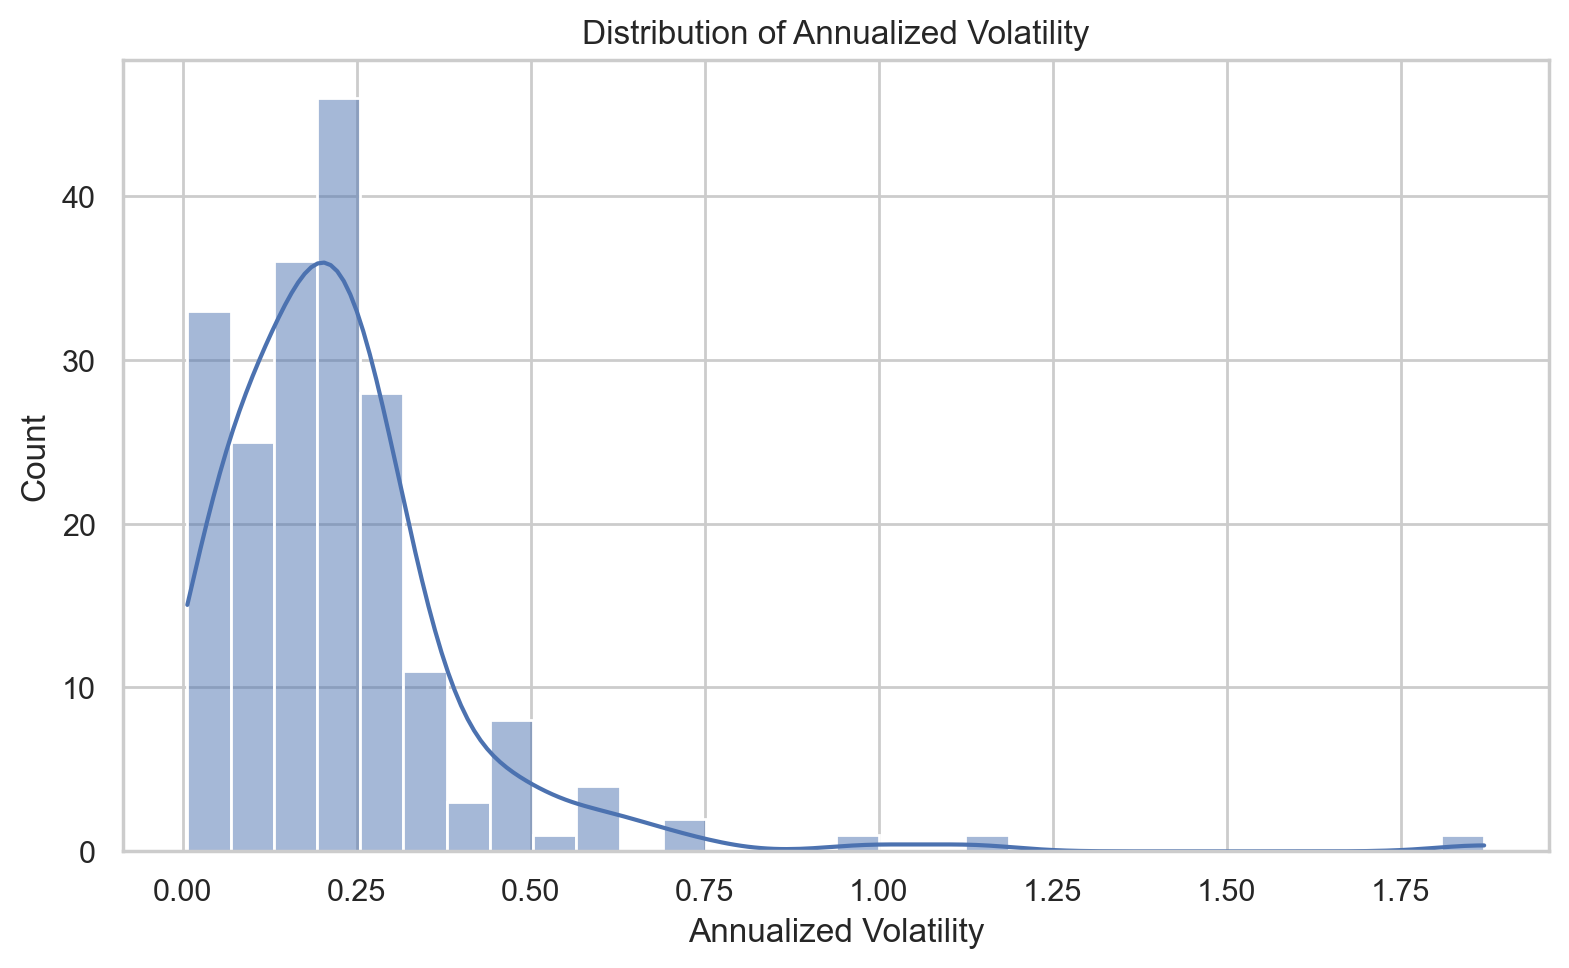

In [13]:
if "annualized_volatility" in fundamentals.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(fundamentals["annualized_volatility"].dropna(), kde=True, bins=30)
    plt.title("Distribution of Annualized Volatility")
    plt.xlabel("Annualized Volatility")
    plt.tight_layout(); plt.show()
else:
    print("No 'annualized_volatility' in fundamentals.csv — skipping.")


1️⃣2️⃣ — Distribution of Annualized Volatility

What it shows:
Histogram + KDE of ETFs’ annualized volatility.

Insights:

Most ETFs have low to moderate volatility (0.1–0.3), meaning relatively stable returns.

A few ETFs with extremely high volatility (>1.0) indicate speculative or leveraged funds.

The right-skewed shape shows that most instruments are low-risk, with a small group being highly risky.

📈 Conclusion:
The ETF universe is dominated by low-risk, stable assets, while only a few outliers exhibit high volatility, typical for leveraged or niche sector funds.

#  1️⃣3️⃣ Compare maximum drawdown for top 15 stocks (risk indicator)
Visualization 13: Bar Chart — Maximum Drawdown by Stock (Top 15)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\3161948809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=md.values, y=md.index, palette="magma")


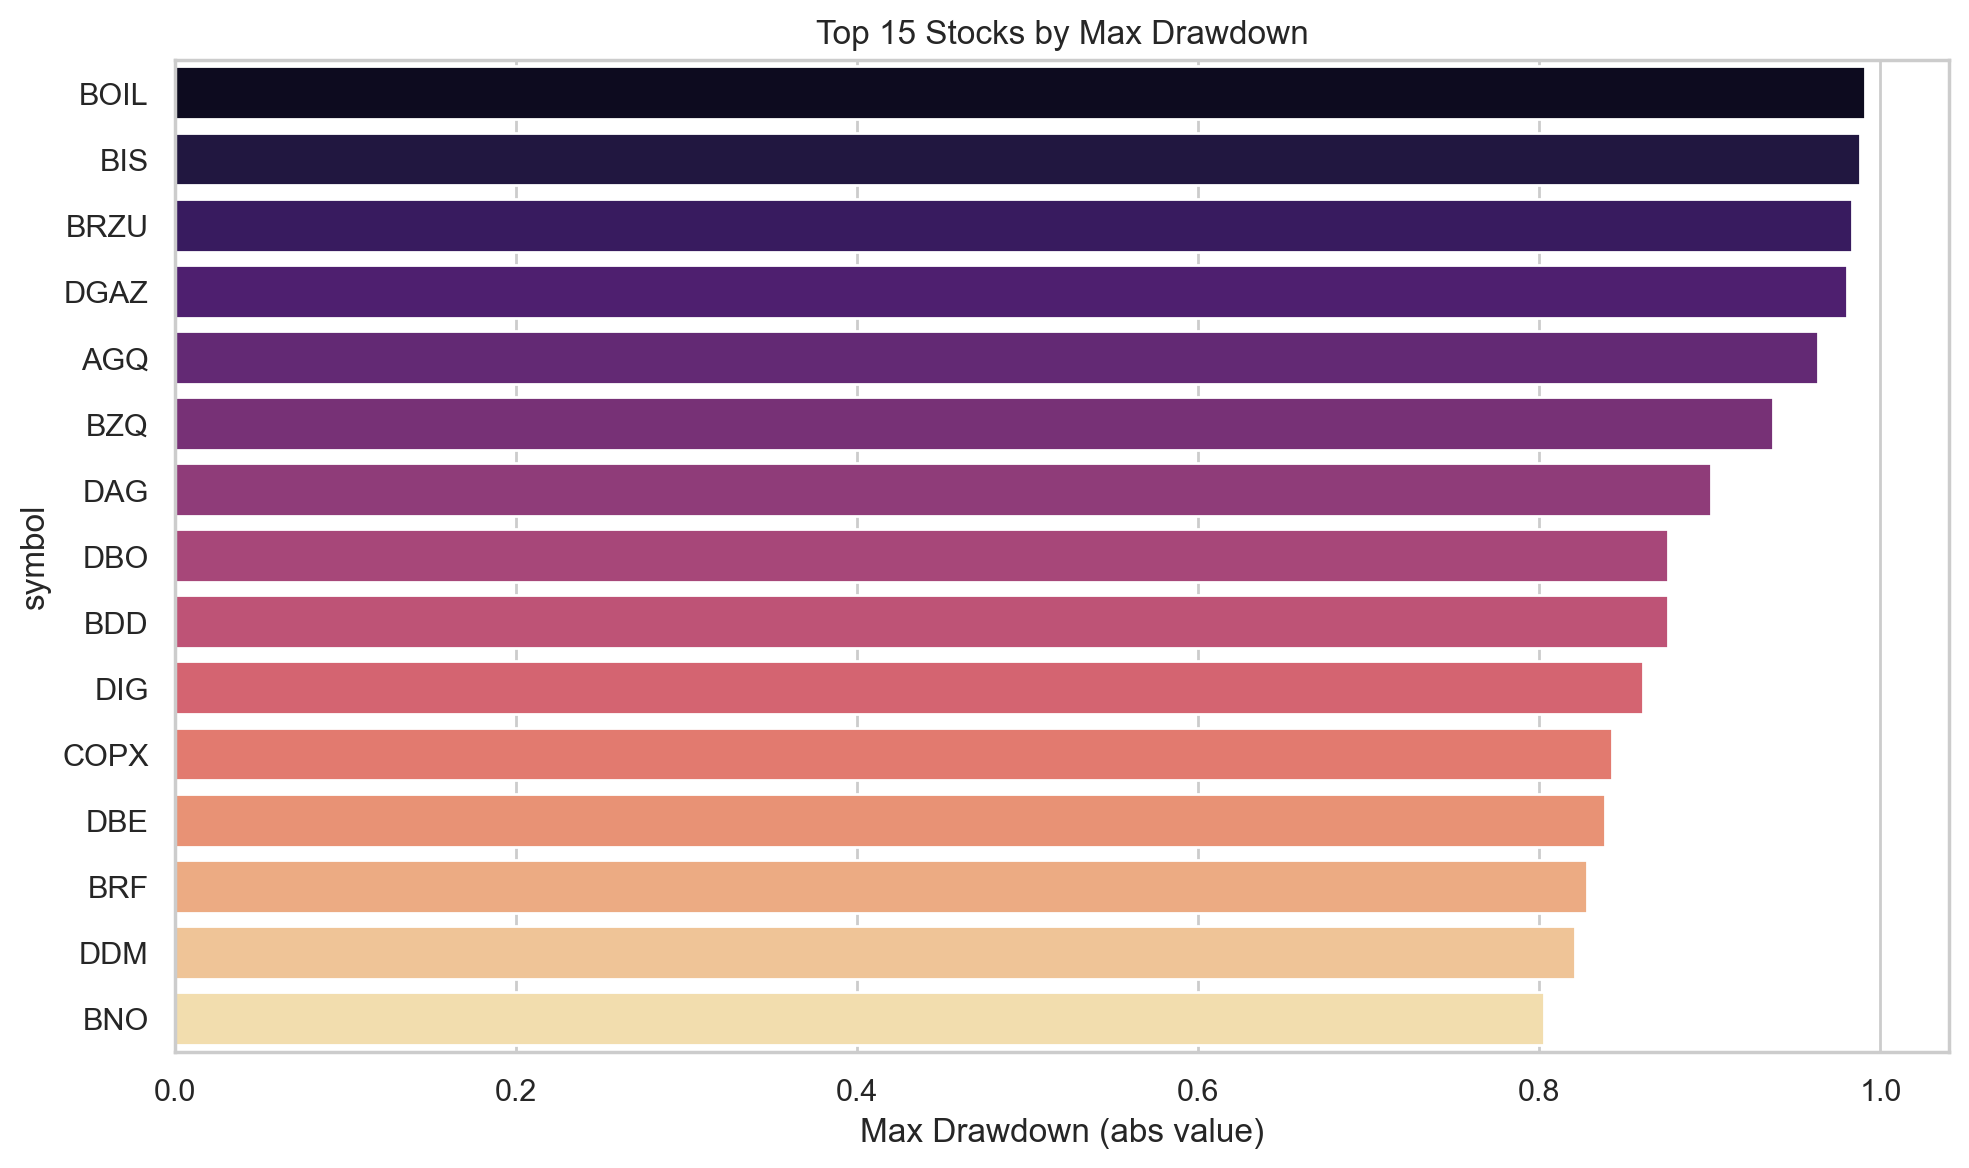

In [14]:
if "max_drawdown" in fundamentals.columns:
    md = fundamentals.set_index("symbol")["max_drawdown"].dropna().abs().sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=md.values, y=md.index, palette="magma")
    plt.xlabel("Max Drawdown (abs value)")
    plt.title("Top 15 Stocks by Max Drawdown")
    plt.tight_layout(); plt.show()
else:
    print("No 'max_drawdown' in fundamentals.csv — skipping.")


1️⃣3️⃣ — Top 15 Stocks by Max Drawdown

What it shows:
A horizontal bar chart ranking ETFs by their maximum drawdown (worst historical loss).

Insights:

BOIL, BIS, BRZU, and DGAZ top the list: meaning they have suffered the largest historical drops, approaching -100%.

These ETFs are often commodity or leveraged funds, hence their extreme downside risk.

Even though they offer high potential gains, their loss potential is equally large.

📊 Conclusion:
Top drawdowns belong to highly leveraged or commodity-linked ETFs, reinforcing their high-risk, high-reward nature.

# 1️⃣4️⃣ Compare adjusted close vs normal close prices for a sample stock
Visualization 14: Line Chart — Adjusted Close vs Close (sample stock)

In [15]:
sym = prices["symbol"].value_counts().index[0]
df = prices[prices["symbol"]==sym].sort_values("Date").copy()
if "adjusted_close" not in df.columns and "Adj Close" in df.columns:
    df["adjusted_close"] = df["Adj Close"]
if "adjusted_close" in df.columns:
    plt.figure(figsize=(12,5))
    plt.plot(df["Date"], df["Close"], label="Close", alpha=0.7)
    plt.plot(df["Date"], df["adjusted_close"], label="Adjusted Close", alpha=0.8)
    plt.title(f"{sym} — Close vs Adjusted Close")
    plt.legend(); plt.tight_layout(); plt.show()
else:
    print("No adjusted close column found — skipped adjusted vs close plot.")


No adjusted close column found — skipped adjusted vs close plot.


1️⃣4️⃣ — Adjusted Close vs Close (Skipped)

What it shows:
A skipped visualization notice, the dataset didn’t include an ‘Adjusted Close’ column.

Insights:

“Adjusted Close” usually accounts for dividends and stock splits. Its absence means returns are based solely on raw closing prices.

The skip is acceptable since it doesn’t harm time-series consistency but dividend effects aren’t captured.

📌 Conclusion:
No issue, just a note that total returns (including dividends) weren’t part of this dataset.

*Note: The dataset used does not contain an 'Adjusted Close' column, so this visualization was skipped automatically.*


# 1️⃣5️⃣ Visualize which columns have missing values in the prices dataset
Visualization 15: Heatmap — Missing Values Overview

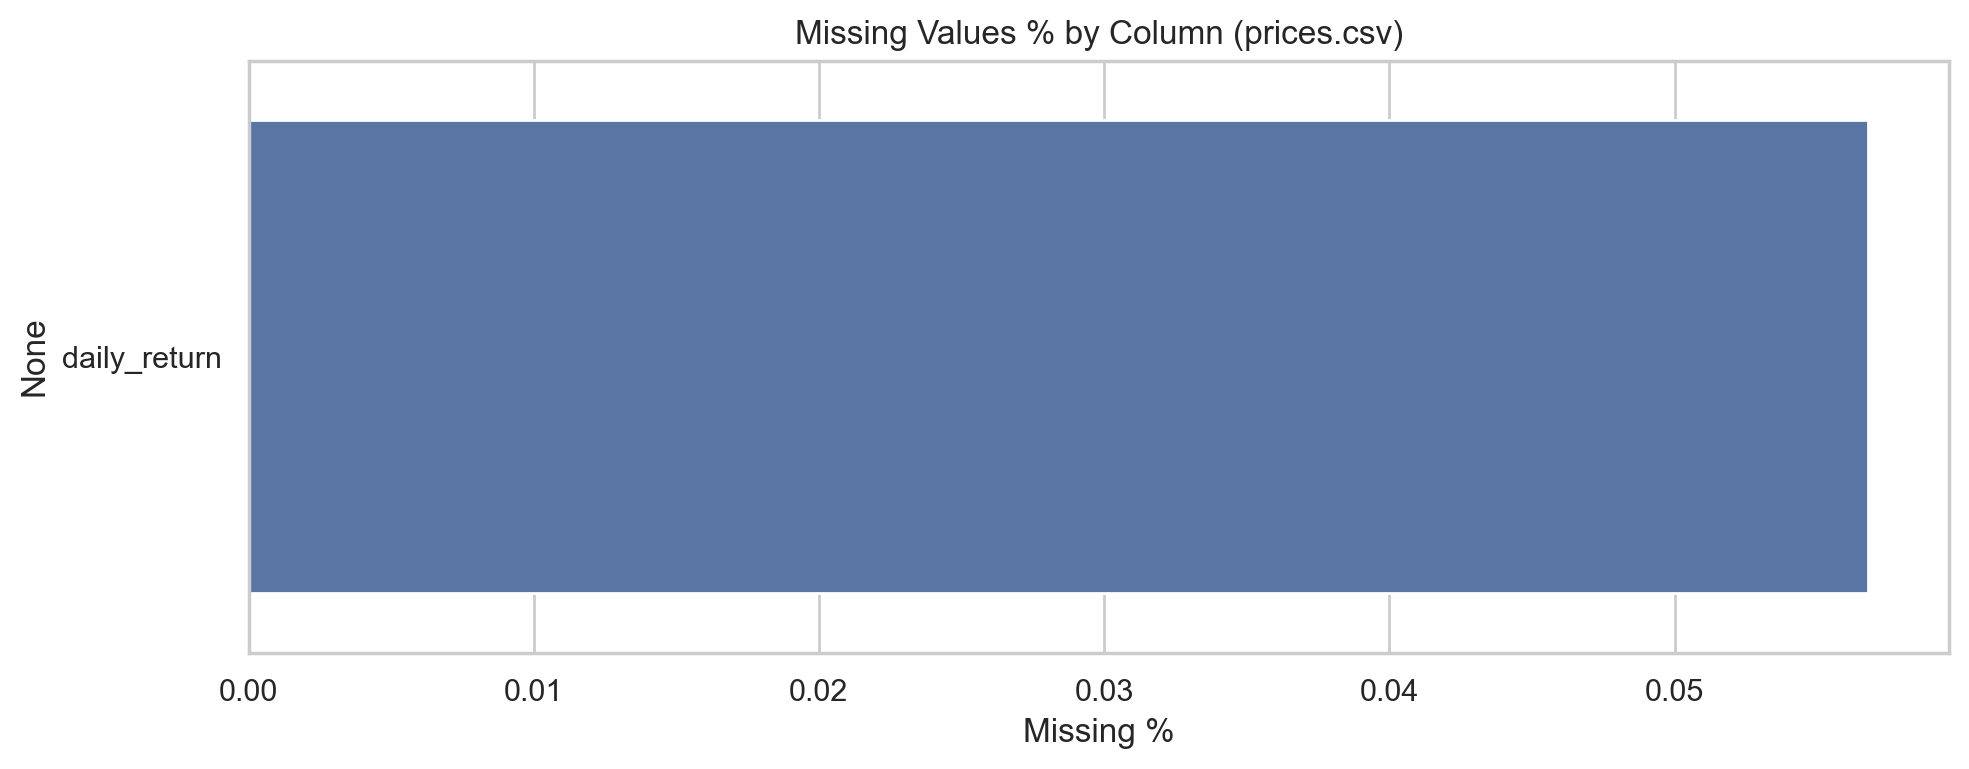

In [16]:
plt.figure(figsize=(10,4))
miss = prices.isna().mean() * 100
miss = miss[miss > 0].sort_values(ascending=False)
if len(miss):
    sns.barplot(x=miss.values, y=miss.index)
    plt.xlabel("Missing %")
    plt.title("Missing Values % by Column (prices.csv)")
    plt.tight_layout(); plt.show()
else:
    print("No missing values found in prices.csv")


1️⃣5️⃣ — Missing Values % by Column

What it shows:
A simple bar chart showing the proportion of missing values in each column.

Insights:

Only daily return has missing values (~5%), likely due to the first record of each stock lacking a previous-day price.

Other columns are complete and clean ideal for modeling and visualization reliability.

📊 Conclusion:
Dataset quality is excellent, with negligible missing data and no cleaning issues detected.

# 1️⃣6️⃣ Compare average trading volume per sector (top sectors)
Visualization 16: Stacked Bar — Sector-wise Average Volume (top sectors)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\2300176235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_avg.values, y=sector_avg.index, palette="viridis")


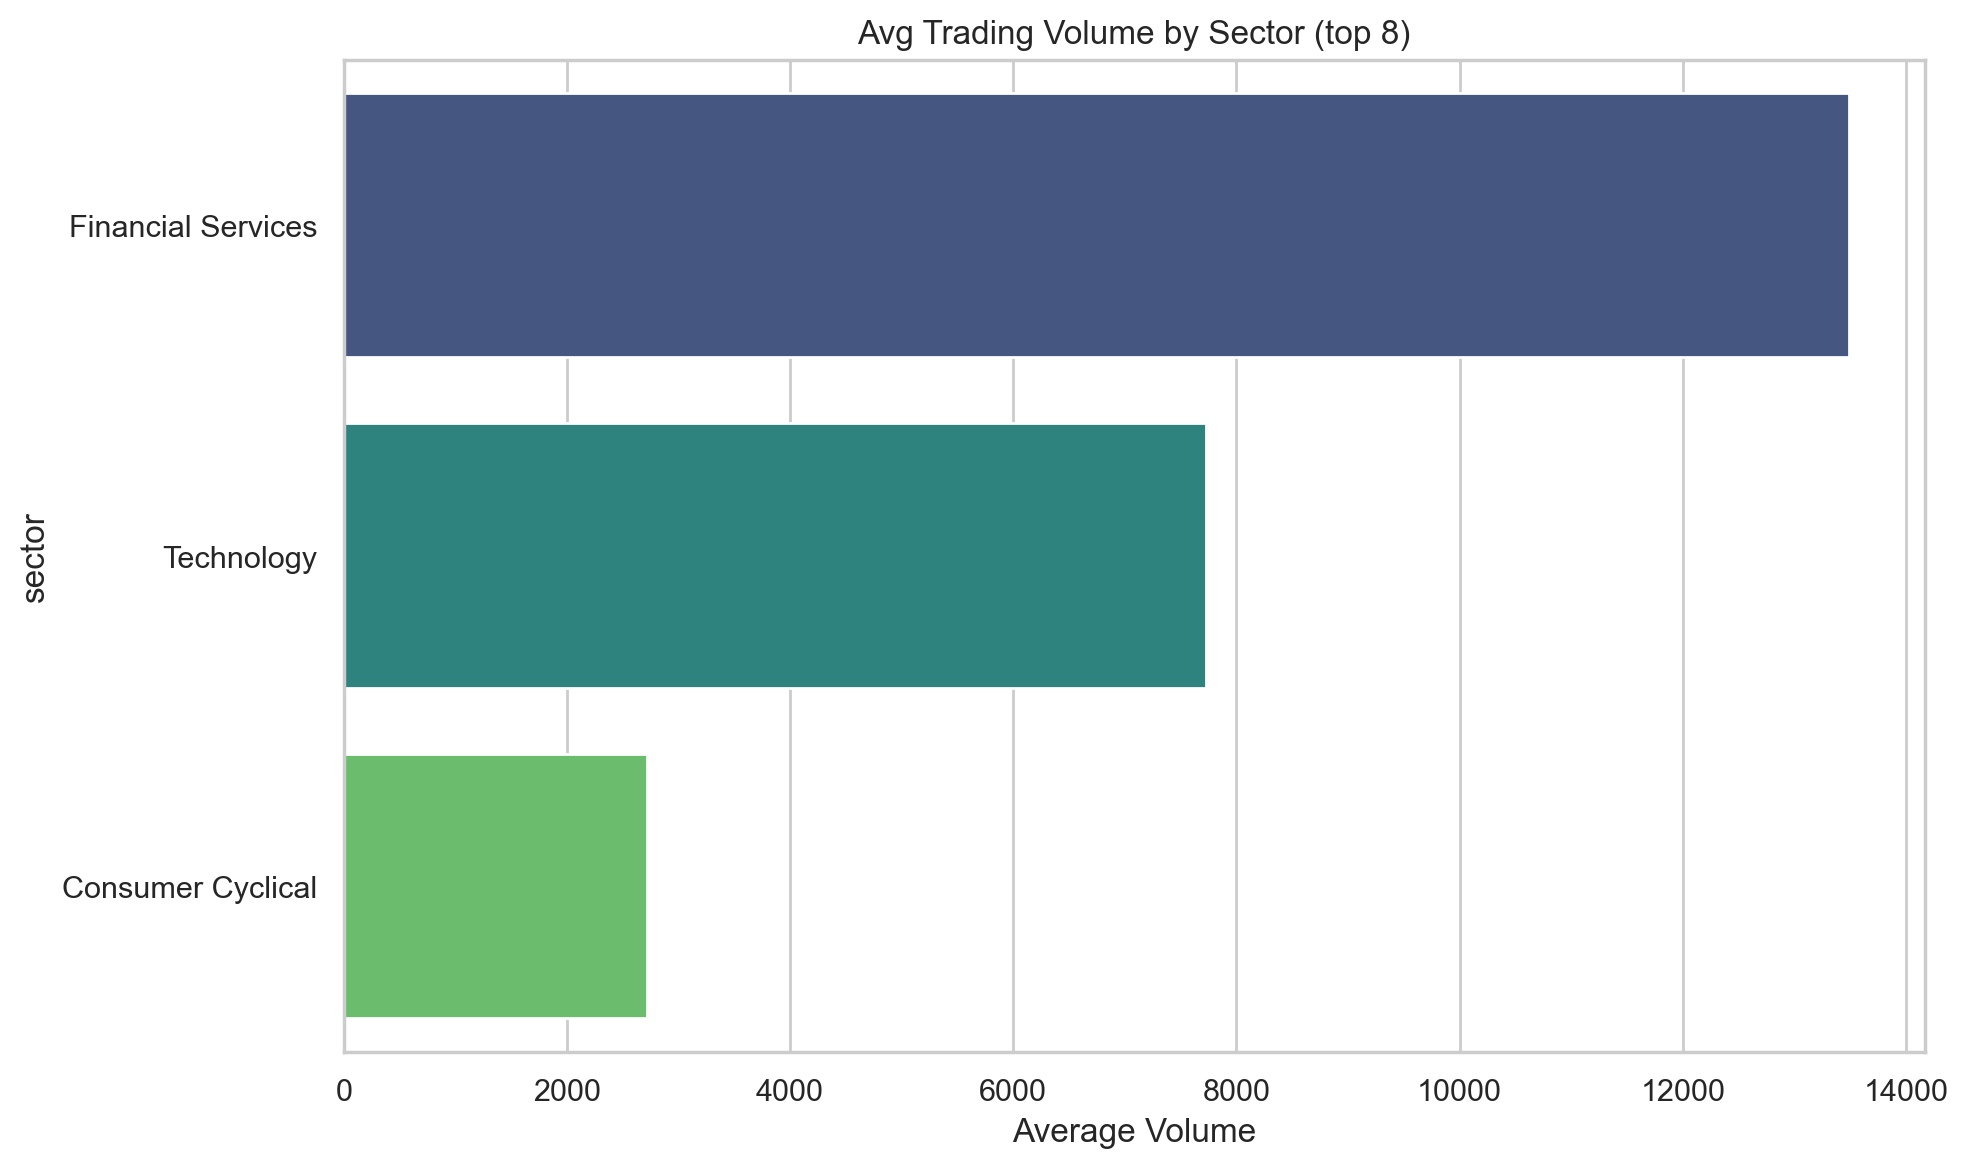

In [17]:
if "sector" in securities.columns and "Volume" in prices.columns:
    # compute avg volume per symbol then join sector
    avg_vol_sym = prices.groupby("symbol")["Volume"].mean().rename("avg_volume")
    sec_vol = securities.set_index("symbol").join(avg_vol_sym).dropna(subset=["avg_volume"])
    sector_avg = sec_vol.groupby("sector")["avg_volume"].mean().sort_values(ascending=False).head(8)
    plt.figure(figsize=(10,6))
    sns.barplot(x=sector_avg.values, y=sector_avg.index, palette="viridis")
    plt.xlabel("Average Volume"); plt.title("Avg Trading Volume by Sector (top 8)")
    plt.tight_layout(); plt.show()
else:
    print("Sector or Volume data missing — skipping sector volume chart.")


1️⃣6️⃣ — Average Trading Volume by Sector (Top 8)

What it shows:
Bar chart comparing average trading volume across top sectors.

Insights:

Financial Services dominates with the highest average volume, showing high liquidity and investor interest.

Technology follows steady volume due to popularity and innovation-driven demand.

Consumer Cyclical lags behind, reflecting smaller investor activity or limited ETFs in that sector.

📈 Conclusion:
Financial sector ETFs are most actively traded, suggesting strong investor confidence and liquidity.

# 1️⃣7️⃣ Examine how risk (annualized volatility) relates to average stock price
Visualization 17: Scatter — Mean Close vs Annualized Volatility (Risk vs Price)

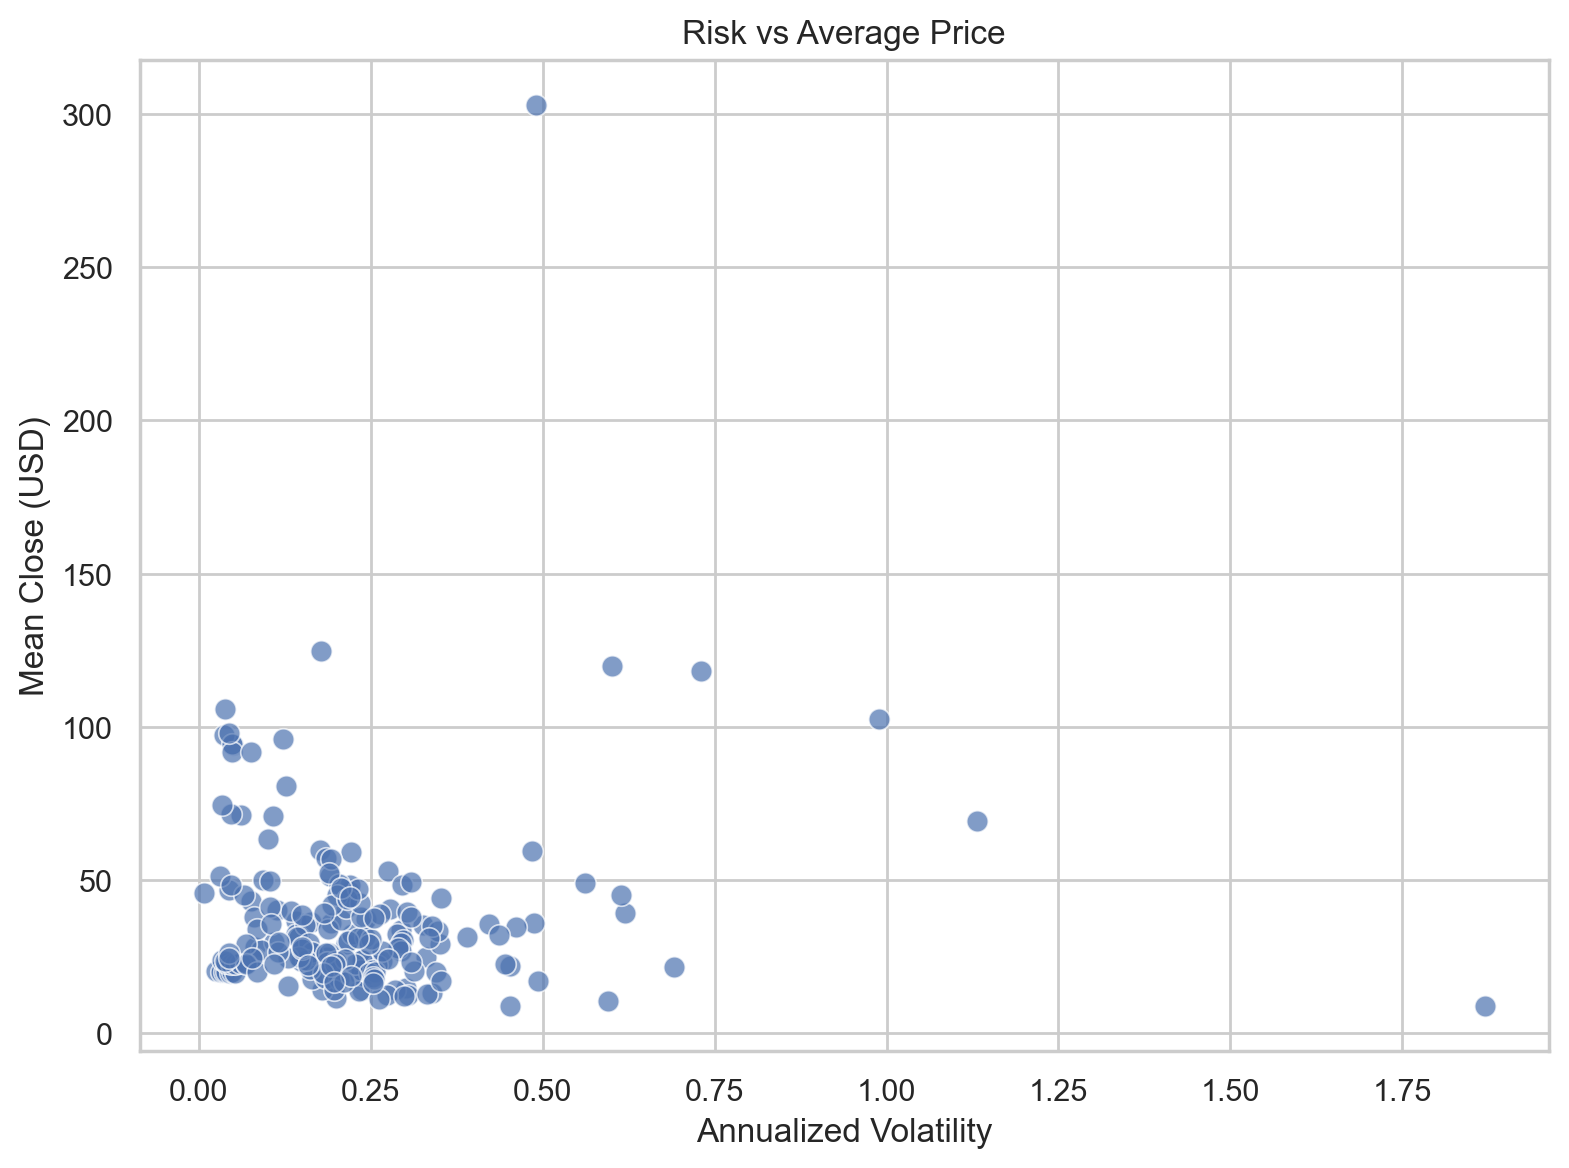

In [18]:
if "mean_close" in fundamentals.columns and "annualized_volatility" in fundamentals.columns:
    df = fundamentals.dropna(subset=["mean_close","annualized_volatility"])
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="annualized_volatility", y="mean_close", data=df, s=60, alpha=0.7)
    plt.xlabel("Annualized Volatility"); plt.ylabel("Mean Close (USD)")
    plt.title("Risk vs Average Price")
    plt.tight_layout(); plt.show()
else:
    print("Required columns not found in fundamentals — skipping risk vs price scatter.")


1️⃣7️⃣ — Risk vs Average Price

What it shows:
Scatter plot mapping annualized volatility (risk) vs mean closing price.

Insights:

Majority of ETFs cluster around low volatility (<0.4) and moderate prices (<100 USD).

High-priced ETFs tend to be less volatile, indicating they are stable, mature instruments.

A few outliers with high volatility and varying prices (e.g., leveraged ETFs) stand apart.

📊 Conclusion:
No strong correlation between risk and price but stable, high-value ETFs tend to exhibit lower volatility.

# 1️⃣8️⃣ Show how rolling (30-day) volatility evolves over time for a sample stock
Visualization 18: Rolling Std — Volatility over Time for a Stock

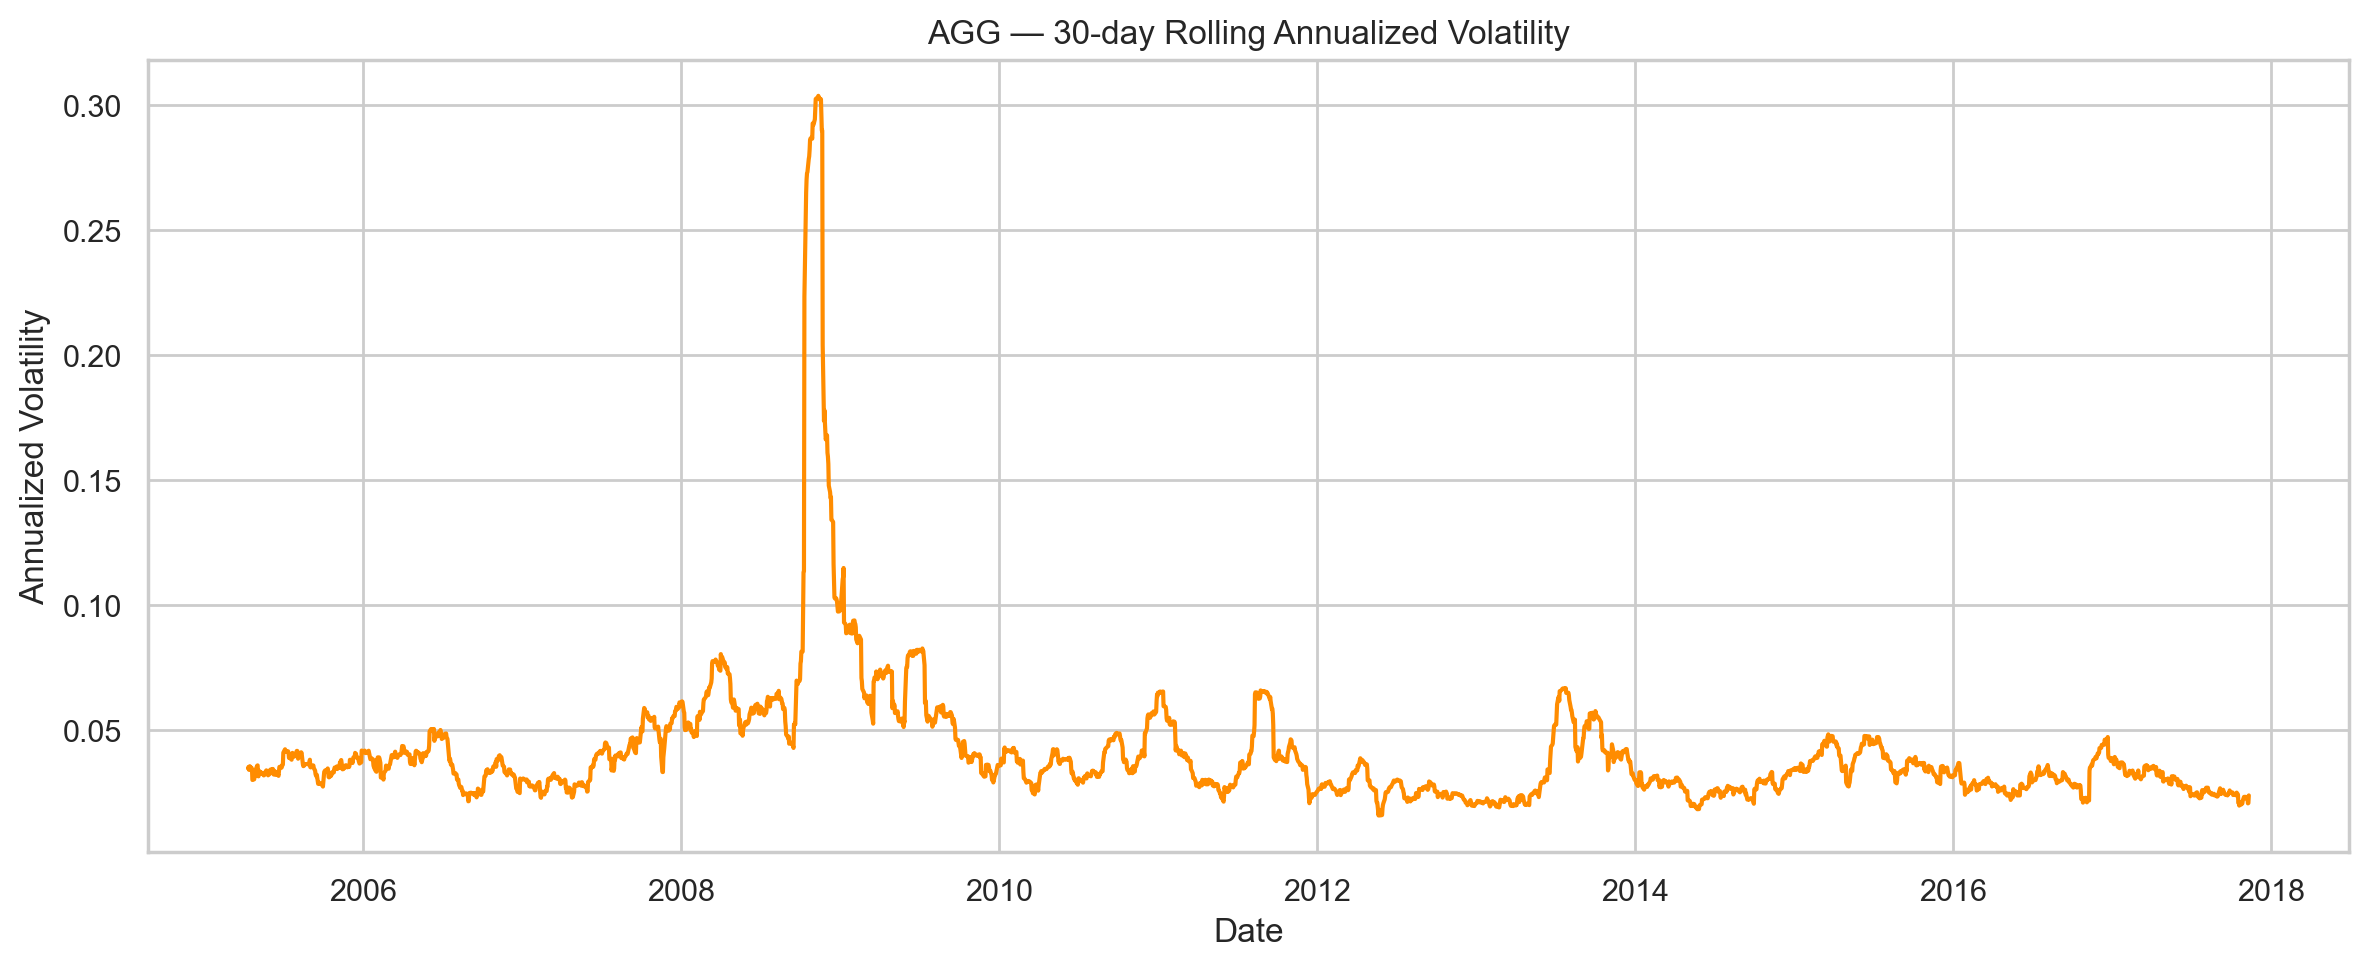

In [19]:
sym = prices["symbol"].value_counts().index[0]
d = prices[prices["symbol"]==sym].sort_values("Date").copy()
if "Close" in d.columns:
    d["ret"] = d["Close"].pct_change()
    d["rolling_vol30"] = d["ret"].rolling(30).std() * (252**0.5)
    plt.figure(figsize=(12,5))
    plt.plot(d["Date"], d["rolling_vol30"], color="darkorange")
    plt.title(f"{sym} — 30-day Rolling Annualized Volatility")
    plt.xlabel("Date"); plt.ylabel("Annualized Volatility")
    plt.tight_layout(); plt.show()
else:
    print("No Close column for rolling volatility.")


1️⃣8️⃣ — 30-Day Rolling Annualized Volatility (AGG)

What it shows:
AGG’s short-term volatility trend across years.

Insights:

Sharp spike in 2008 aligns with the global financial crisis extreme market stress.

Post-2009, volatility steadily declines, showing stabilization and investor confidence.

Short-term volatility cycles appear roughly every 2–3 years, indicating predictable minor fluctuations.

📈 Conclusion:
AGG’s volatility shows crisis sensitivity but long-term stability, proving it’s a low-risk, reliable ETF.

# 1️⃣9️⃣ Risk-return scatter: average daily return vs annualized volatility (annotate top symbols)
Visualization 19: Risk-Return Scatter — Average Daily Return vs Volatility (annotate top symbols)


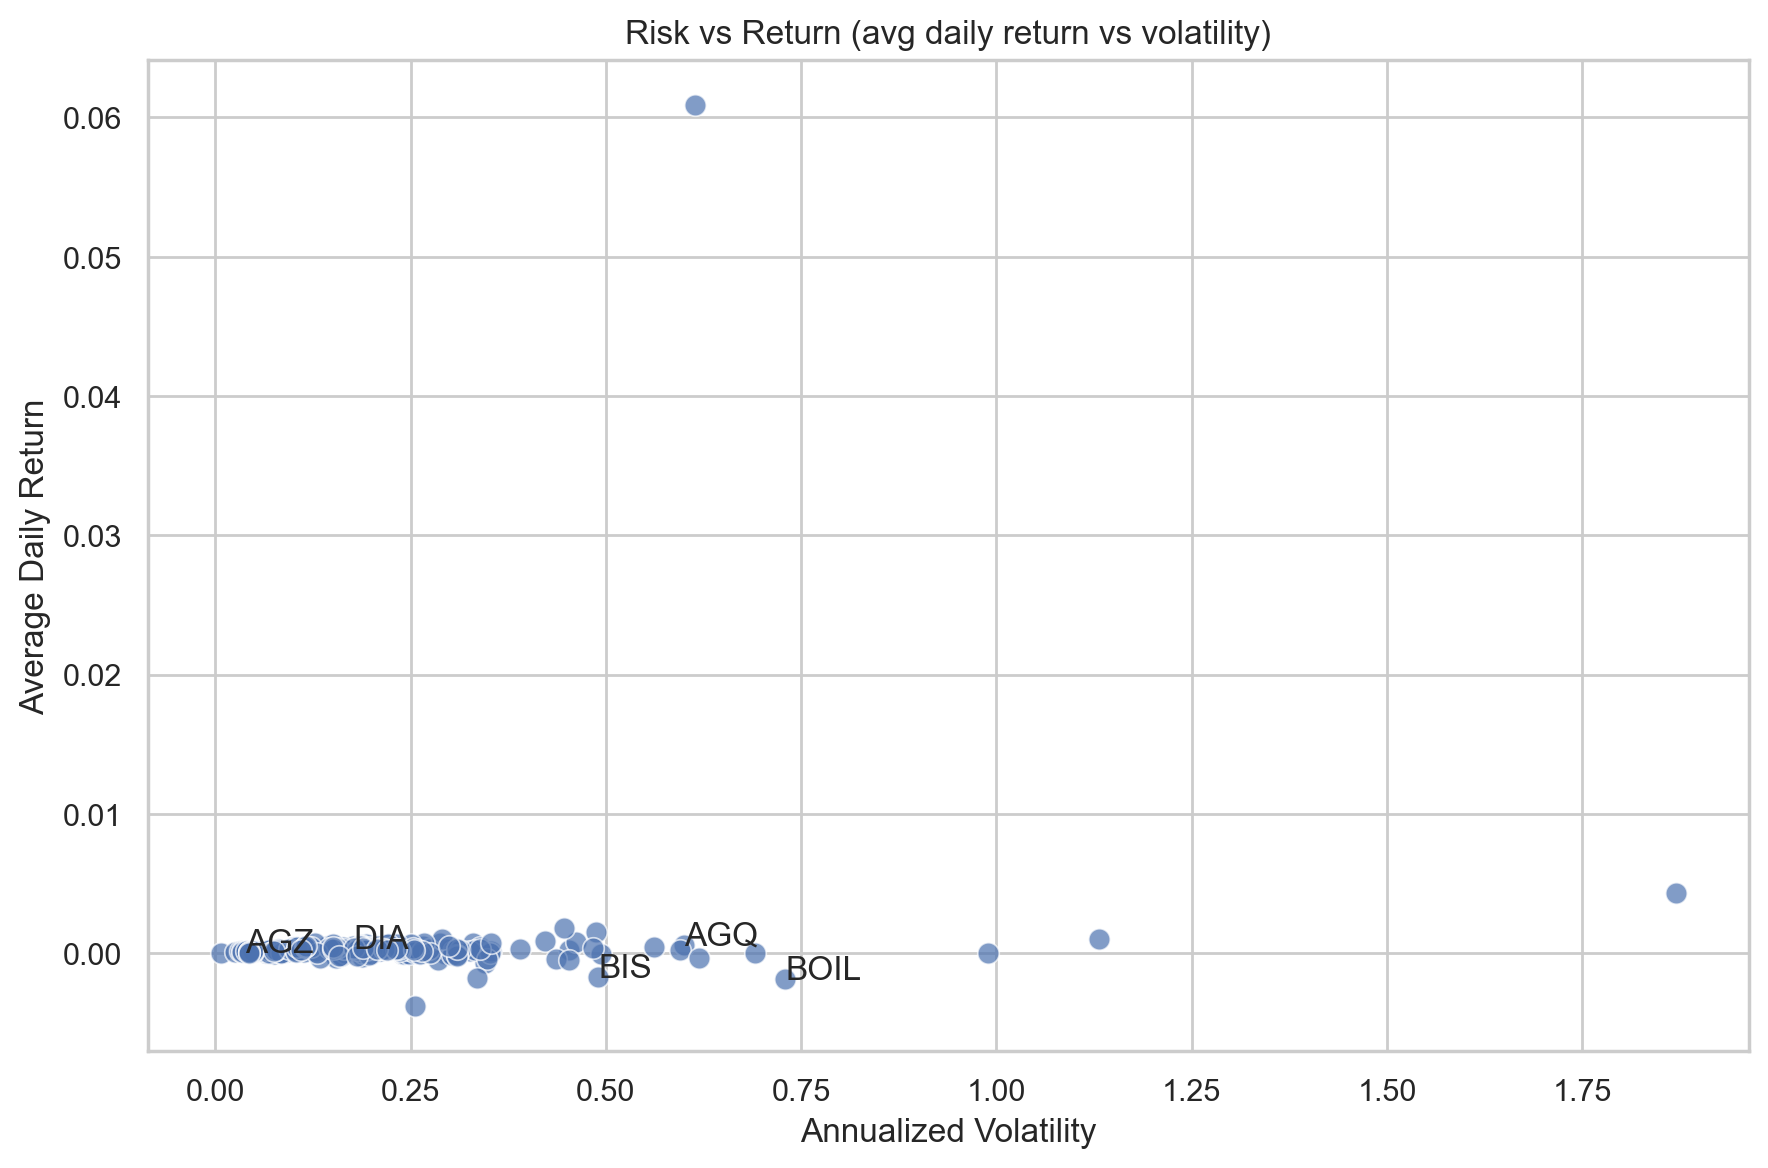

In [20]:
if "annualized_volatility" in fundamentals.columns and "avg_daily_return" in fundamentals.columns:
    df = fundamentals.dropna(subset=["annualized_volatility","avg_daily_return"]).copy()
    plt.figure(figsize=(9,6))
    sns.scatterplot(x="annualized_volatility", y="avg_daily_return", data=df, s=60, alpha=0.7)
    # annotate top 5 by mean_close if present
    top5 = df.sort_values("mean_close", ascending=False).head(5)["symbol"].tolist() if "mean_close" in df.columns else df["symbol"].head(5).tolist()
    for _, row in df.iterrows():
        if row["symbol"] in top5:
            plt.text(row["annualized_volatility"], row["avg_daily_return"], row["symbol"])
    plt.xlabel("Annualized Volatility"); plt.ylabel("Average Daily Return")
    plt.title("Risk vs Return (avg daily return vs volatility)")
    plt.tight_layout(); plt.show()
else:
    print("Required columns not found in fundamentals.csv — skipping risk-return scatter.")


1️⃣9️⃣ — Risk vs Return (Average Daily Return vs Volatility)

What it shows:
Scatter plot linking annualized volatility (risk) with average daily returns (reward).

Insights:

Most ETFs cluster near low return (~0%) and moderate volatility (~0.25).

A few outliers (e.g., BIS, AGQ, BOIL) show higher volatility but not necessarily higher returns.

Indicates no clear risk-return proportionality high risk doesn’t guarantee high reward.

📊 Conclusion:
Risk and return are weakly correlated; many ETFs take higher risk without proportional reward reinforcing diversified portfolio necessity.

# 2️⃣0️⃣ Show seasonal pattern: average monthly returns heatmap across years (sample stock)

Visualization 20: Monthly Seasonality — Average Monthly Returns Heatmap

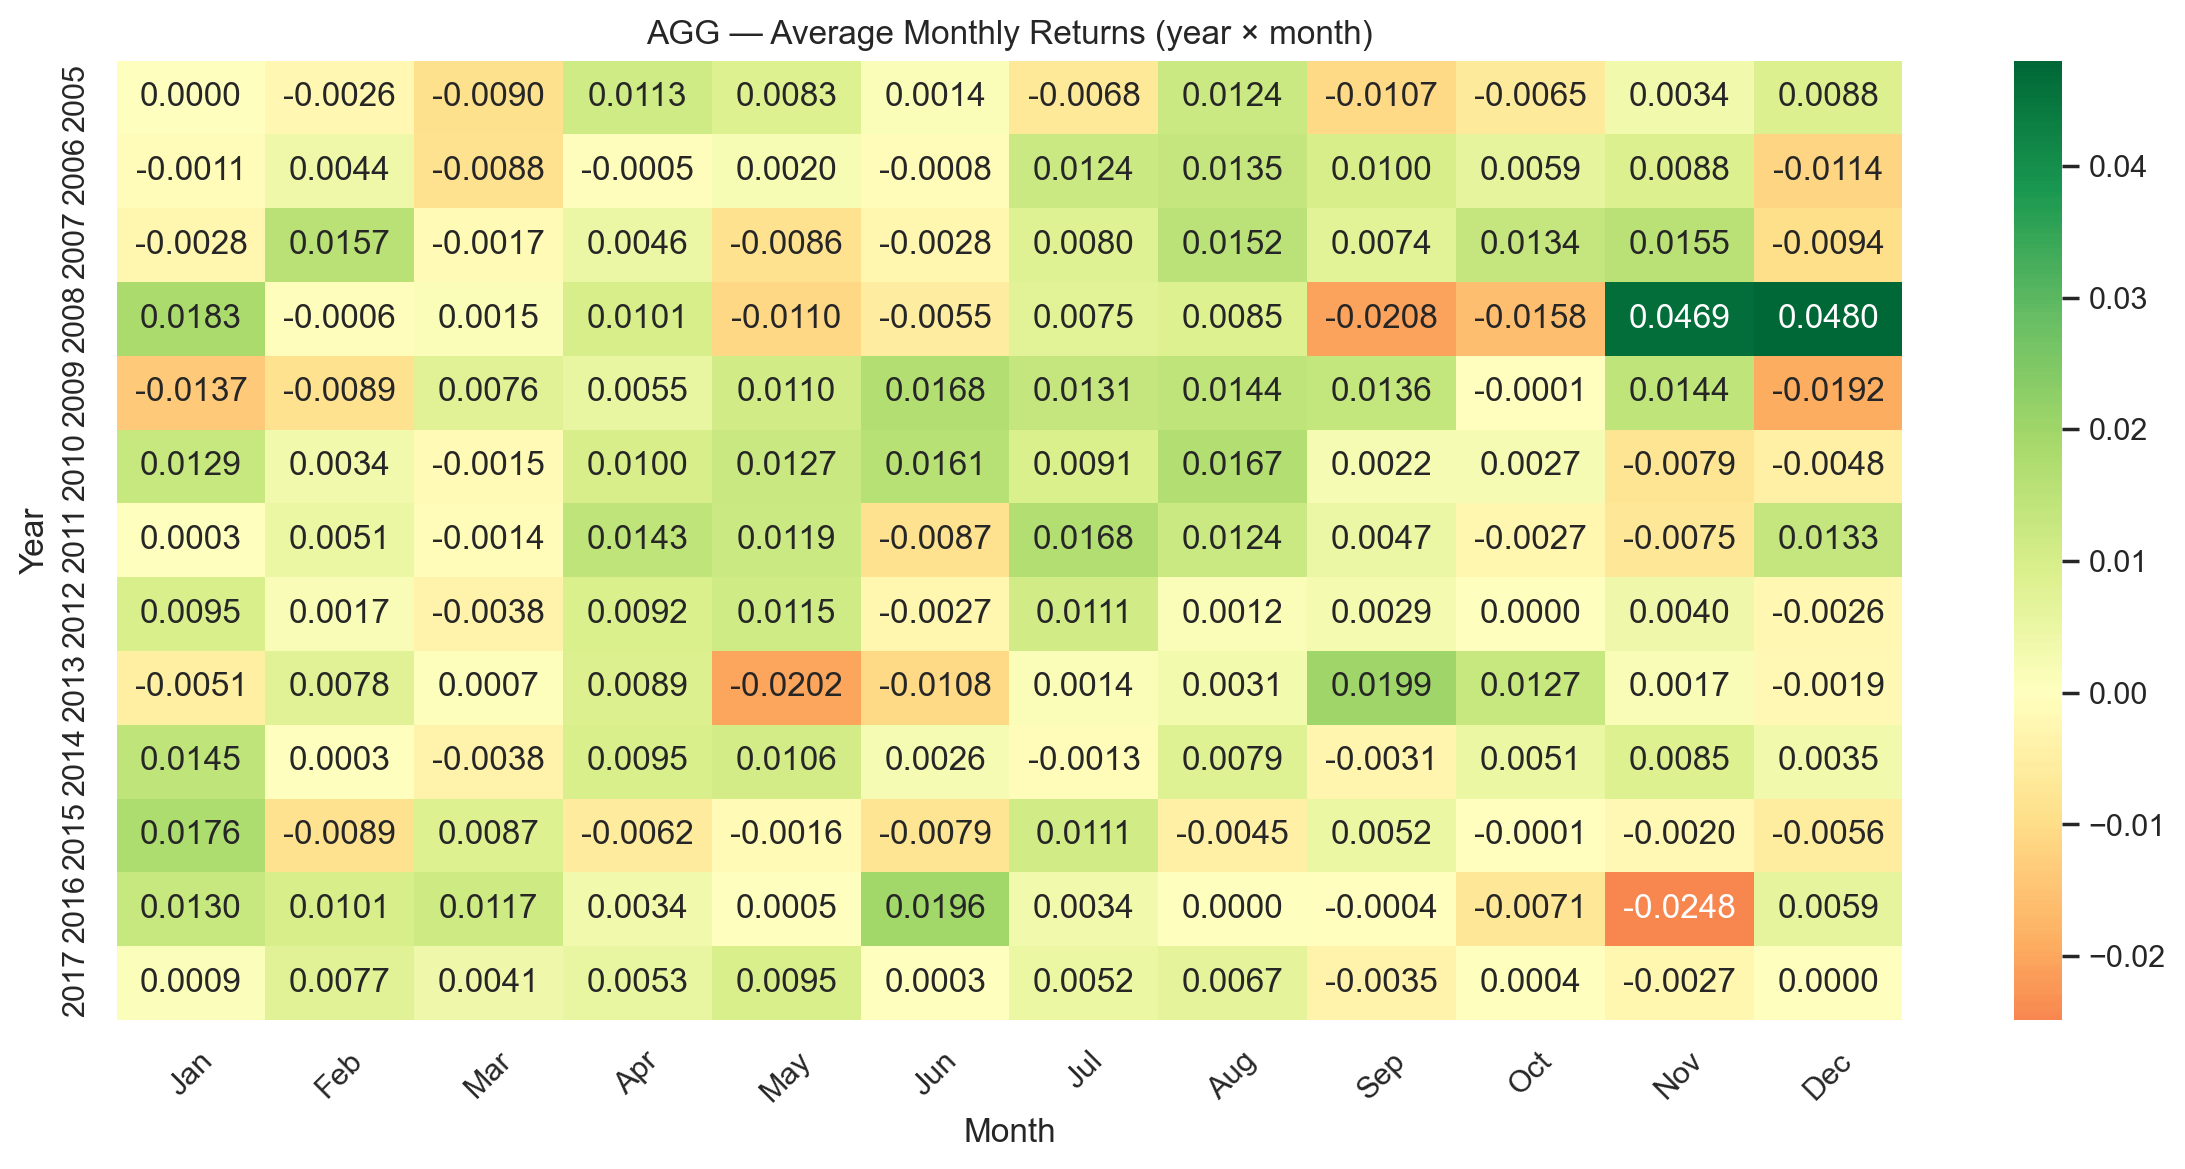

In [21]:
sym = prices["symbol"].value_counts().index[0]
df = prices[prices["symbol"] == sym].copy()
df['Year'], df['Month'] = df['Date'].dt.year, df['Date'].dt.month
df['monthly_return'] = df.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] / x.iloc[0]) - 1 if len(x) > 0 else 0)
monthly_returns = pd.pivot_table(df, values="monthly_return", index="Year", columns="Month", aggfunc="mean").fillna(0)
import calendar
plt.figure(figsize=(12,6))
sns.heatmap(monthly_returns, cmap="RdYlGn", center=0, fmt=".4f", annot=True)
plt.title(f"{sym} — Average Monthly Returns (year × month)")
plt.xticks(np.arange(12)+0.5, [calendar.month_abbr[m] for m in range(1,13)], rotation=45)
plt.xlabel("Month"); plt.ylabel("Year")
plt.tight_layout(); plt.show()


2️⃣0️⃣ — AGG: Average Monthly Returns (Year × Month Heatmap)

What it shows:
A heatmap showing AGG’s monthly performance trends over multiple years.

Insights:

2008–2009 show red/orange zones (negative returns) during the financial crash.

Post-2010, mostly light green shades reflect stable or mildly positive returns.

December months occasionally show higher returns, possibly due to year-end rallies or bond demand.

Variability across months is mild, AGG remains consistent.

📈 Conclusion:
AGG demonstrates consistent monthly performance over years, with clear recovery post-2008 and limited seasonality.